from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-15 05:32:36.945224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 05:32:38.316322: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 05:32:38.349867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-15 05:32:38.349896: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Data Format

In [2]:
data = pd.read_csv("data/LocationD.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempD,pHD,ECD,DOD,BODD,TND
0,21.40,8.48,1695,2.59,27.93,1.27
1,20.75,8.44,1773,2.64,27.86,1.19
2,21.17,8.45,1737,2.61,27.71,1.23
3,21.20,8.36,1743,2.67,27.15,1.12
4,20.81,8.48,1787,2.68,27.19,1.13


In [3]:
target_column = "ECD"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [4]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [5]:
X[0], y[0]

(array([21.4 ,  8.48,  2.59, 27.93,  1.27, 20.75,  8.44,  2.64, 27.86,
         1.19, 21.17,  8.45,  2.61, 27.71,  1.23]),
 1743)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [9]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [10]:
epochs = 50

# General Model

### CNN

In [11]:
x_train = xt.copy()

2024-03-15 05:32:47.834769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:32:47.839940: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:32:47.840018: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:32:47.841045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 14s - loss: 2359040.0000 - root_mean_squared_error: 1535.9166

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 437ms/step - loss: 2507249.2500 - root_mean_squared_error: 1583.4296 - val_loss: 2479811.2500 - val_root_mean_squared_error: 1574.7417
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2663082.7500 - root_mean_squared_error: 1631.8955

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 314ms/step - loss: 2501756.7500 - root_mean_squared_error: 1581.6942 - val_loss: 2475148.2500 - val_root_mean_squared_error: 1573.2604
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2516339.7500 - root_mean_squared_error: 1586.2975

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 485ms/step - loss: 2497328.5000 - root_mean_squared_error: 1580.2938 - val_loss: 2470596.2500 - val_root_mean_squared_error: 1571.8130
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2502005.2500 - root_mean_squared_error: 1581.7728

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 301ms/step - loss: 2492882.0000 - root_mean_squared_error: 1578.8864 - val_loss: 2466024.2500 - val_root_mean_squared_error: 1570.3580
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2490479.5000 - root_mean_squared_error: 1578.1254

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 479ms/step - loss: 2488400.2500 - root_mean_squared_error: 1577.4664 - val_loss: 2461396.5000 - val_root_mean_squared_error: 1568.8838
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2483868.0000 - root_mean_squared_error: 1576.0292

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 477ms/step - loss: 2483868.0000 - root_mean_squared_error: 1576.0292 - val_loss: 2456728.5000 - val_root_mean_squared_error: 1567.3955
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2464771.7500 - root_mean_squared_error: 1569.9591

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 371ms/step - loss: 2479284.2500 - root_mean_squared_error: 1574.5743 - val_loss: 2452002.2500 - val_root_mean_squared_error: 1565.8871
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2474614.5000 - root_mean_squared_error: 1573.0907

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 293ms/step - loss: 2474614.5000 - root_mean_squared_error: 1573.0907 - val_loss: 2447216.0000 - val_root_mean_squared_error: 1564.3580
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2416643.0000 - root_mean_squared_error: 1554.5555

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 421ms/step - loss: 2469907.5000 - root_mean_squared_error: 1571.5940 - val_loss: 2442372.2500 - val_root_mean_squared_error: 1562.8091
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2477865.7500 - root_mean_squared_error: 1574.1238

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 495ms/step - loss: 2465194.0000 - root_mean_squared_error: 1570.0936 - val_loss: 2437484.7500 - val_root_mean_squared_error: 1561.2446
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2515632.2500 - root_mean_squared_error: 1586.0745

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 2460405.7500 - root_mean_squared_error: 1568.5681 - val_loss: 2432553.7500 - val_root_mean_squared_error: 1559.6647
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2455510.7500 - root_mean_squared_error: 1567.0070

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 598ms/step - loss: 2455510.7500 - root_mean_squared_error: 1567.0070 - val_loss: 2427542.5000 - val_root_mean_squared_error: 1558.0573
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2450585.5000 - root_mean_squared_error: 1565.4346

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 485ms/step - loss: 2450585.5000 - root_mean_squared_error: 1565.4346 - val_loss: 2422397.5000 - val_root_mean_squared_error: 1556.4053
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2453238.2500 - root_mean_squared_error: 1566.2816

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 624ms/step - loss: 2445560.0000 - root_mean_squared_error: 1563.8286 - val_loss: 2417197.2500 - val_root_mean_squared_error: 1554.7338
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2138336.2500 - root_mean_squared_error: 1462.3052

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 2440409.0000 - root_mean_squared_error: 1562.1809 - val_loss: 2411914.5000 - val_root_mean_squared_error: 1553.0339
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2447460.7500 - root_mean_squared_error: 1564.4363

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 2435230.7500 - root_mean_squared_error: 1560.5226 - val_loss: 2406541.7500 - val_root_mean_squared_error: 1551.3033
Epoch 17/50
4/8 [==============>...............] - ETA: 0s - loss: 2478630.5000 - root_mean_squared_error: 1574.3667

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 2429951.5000 - root_mean_squared_error: 1558.8302 - val_loss: 2401090.0000 - val_root_mean_squared_error: 1549.5450
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2430039.5000 - root_mean_squared_error: 1558.8584

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 439ms/step - loss: 2424584.0000 - root_mean_squared_error: 1557.1075 - val_loss: 2395587.2500 - val_root_mean_squared_error: 1547.7686
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2426028.0000 - root_mean_squared_error: 1557.5712

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 2419147.2500 - root_mean_squared_error: 1555.3608 - val_loss: 2389948.5000 - val_root_mean_squared_error: 1545.9458
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2337578.2500 - root_mean_squared_error: 1528.9141

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 455ms/step - loss: 2413602.0000 - root_mean_squared_error: 1553.5771 - val_loss: 2384202.5000 - val_root_mean_squared_error: 1544.0862
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 2365321.5000 - root_mean_squared_error: 1537.9602

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 7s 957ms/step - loss: 2407901.7500 - root_mean_squared_error: 1551.7416 - val_loss: 2378323.2500 - val_root_mean_squared_error: 1542.1813
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2341957.5000 - root_mean_squared_error: 1530.3456

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 648ms/step - loss: 2402120.7500 - root_mean_squared_error: 1549.8777 - val_loss: 2372330.5000 - val_root_mean_squared_error: 1540.2372
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2404872.2500 - root_mean_squared_error: 1550.7650

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 623ms/step - loss: 2396213.2500 - root_mean_squared_error: 1547.9707 - val_loss: 2366147.7500 - val_root_mean_squared_error: 1538.2288
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2396621.5000 - root_mean_squared_error: 1548.1025

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 598ms/step - loss: 2390128.2500 - root_mean_squared_error: 1546.0039 - val_loss: 2359880.2500 - val_root_mean_squared_error: 1536.1901
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2383968.2500 - root_mean_squared_error: 1544.0105

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 569ms/step - loss: 2383968.2500 - root_mean_squared_error: 1544.0105 - val_loss: 2353523.2500 - val_root_mean_squared_error: 1534.1198
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2366295.5000 - root_mean_squared_error: 1538.2769

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 2377683.5000 - root_mean_squared_error: 1541.9739 - val_loss: 2347029.0000 - val_root_mean_squared_error: 1532.0016
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2510867.2500 - root_mean_squared_error: 1584.5717

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 428ms/step - loss: 2371291.2500 - root_mean_squared_error: 1539.8998 - val_loss: 2340386.0000 - val_root_mean_squared_error: 1529.8320
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2208974.7500 - root_mean_squared_error: 1486.2620

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 670ms/step - loss: 2364721.5000 - root_mean_squared_error: 1537.7651 - val_loss: 2333671.7500 - val_root_mean_squared_error: 1527.6360
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2347629.5000 - root_mean_squared_error: 1532.1976

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 2358091.2500 - root_mean_squared_error: 1535.6078 - val_loss: 2326779.7500 - val_root_mean_squared_error: 1525.3784
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2351792.0000 - root_mean_squared_error: 1533.5553

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2351301.0000 - root_mean_squared_error: 1533.3953 - val_loss: 2319775.0000 - val_root_mean_squared_error: 1523.0808
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2469716.7500 - root_mean_squared_error: 1571.5332

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 2344401.7500 - root_mean_squared_error: 1531.1439 - val_loss: 2312622.2500 - val_root_mean_squared_error: 1520.7308
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2406640.7500 - root_mean_squared_error: 1551.3352

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 362ms/step - loss: 2337333.0000 - root_mean_squared_error: 1528.8339 - val_loss: 2305369.5000 - val_root_mean_squared_error: 1518.3444
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2191248.0000 - root_mean_squared_error: 1480.2865

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 548ms/step - loss: 2330248.5000 - root_mean_squared_error: 1526.5151 - val_loss: 2298027.0000 - val_root_mean_squared_error: 1515.9244
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2280768.2500 - root_mean_squared_error: 1510.2213

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 2323025.0000 - root_mean_squared_error: 1524.1473 - val_loss: 2290556.7500 - val_root_mean_squared_error: 1513.4585
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2315647.0000 - root_mean_squared_error: 1521.7250

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 521ms/step - loss: 2315647.0000 - root_mean_squared_error: 1521.7250 - val_loss: 2282955.7500 - val_root_mean_squared_error: 1510.9453
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2276980.0000 - root_mean_squared_error: 1508.9666

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 2308078.7500 - root_mean_squared_error: 1519.2362 - val_loss: 2275202.0000 - val_root_mean_squared_error: 1508.3772
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2512763.5000 - root_mean_squared_error: 1585.1699

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 2300491.2500 - root_mean_squared_error: 1516.7371 - val_loss: 2267241.5000 - val_root_mean_squared_error: 1505.7362
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2292668.5000 - root_mean_squared_error: 1514.1560

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 7s 971ms/step - loss: 2292668.5000 - root_mean_squared_error: 1514.1560 - val_loss: 2259185.5000 - val_root_mean_squared_error: 1503.0587
Epoch 39/50
4/8 [==============>...............] - ETA: 0s - loss: 2247202.5000 - root_mean_squared_error: 1499.0673

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 2284718.7500 - root_mean_squared_error: 1511.5286 - val_loss: 2251000.7500 - val_root_mean_squared_error: 1500.3335
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2269364.2500 - root_mean_squared_error: 1506.4409

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 635ms/step - loss: 2276593.5000 - root_mean_squared_error: 1508.8385 - val_loss: 2242627.0000 - val_root_mean_squared_error: 1497.5403
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2236379.0000 - root_mean_squared_error: 1495.4528

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 511ms/step - loss: 2268358.0000 - root_mean_squared_error: 1506.1069 - val_loss: 2234068.0000 - val_root_mean_squared_error: 1494.6799
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2263212.2500 - root_mean_squared_error: 1504.3976

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 376ms/step - loss: 2259918.2500 - root_mean_squared_error: 1503.3025 - val_loss: 2225356.5000 - val_root_mean_squared_error: 1491.7629
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2251322.2500 - root_mean_squared_error: 1500.4407

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 362ms/step - loss: 2251322.2500 - root_mean_squared_error: 1500.4407 - val_loss: 2216555.7500 - val_root_mean_squared_error: 1488.8102
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2439212.2500 - root_mean_squared_error: 1561.7977

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 2242584.7500 - root_mean_squared_error: 1497.5262 - val_loss: 2207645.2500 - val_root_mean_squared_error: 1485.8147
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2233863.5000 - root_mean_squared_error: 1494.6115

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 380ms/step - loss: 2233863.5000 - root_mean_squared_error: 1494.6115 - val_loss: 2198547.7500 - val_root_mean_squared_error: 1482.7501
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2225021.7500 - root_mean_squared_error: 1491.6506

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 2224888.0000 - root_mean_squared_error: 1491.6058 - val_loss: 2189347.5000 - val_root_mean_squared_error: 1479.6444
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2106636.2500 - root_mean_squared_error: 1451.4255

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 542ms/step - loss: 2215796.0000 - root_mean_squared_error: 1488.5551 - val_loss: 2179955.2500 - val_root_mean_squared_error: 1476.4672
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2206563.5000 - root_mean_squared_error: 1485.4506

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 490ms/step - loss: 2206563.5000 - root_mean_squared_error: 1485.4506 - val_loss: 2170382.5000 - val_root_mean_squared_error: 1473.2217
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2196901.7500 - root_mean_squared_error: 1482.1949

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 390ms/step - loss: 2197129.2500 - root_mean_squared_error: 1482.2716 - val_loss: 2160703.7500 - val_root_mean_squared_error: 1469.9332
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2231098.5000 - root_mean_squared_error: 1493.6862

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 6ms/step


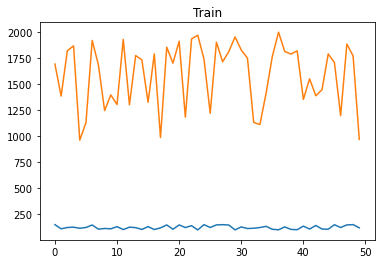

2/2 [==============================] - 0s 3ms/step


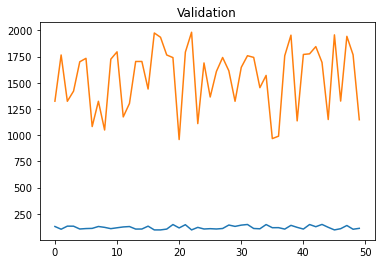

3/3 [==============================] - 0s 3ms/step


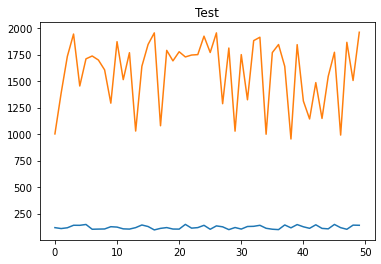

3/3 [==============================] - 0s 3ms/step


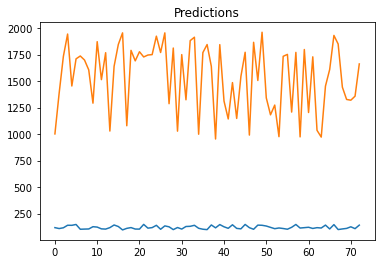

In [12]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2531836.5000 - root_mean_squared_error: 1591.1746

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 36s 3s/step - loss: 2531836.5000 - root_mean_squared_error: 1591.1746 - val_loss: 2508269.0000 - val_root_mean_squared_error: 1583.7516
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2515628.5000 - root_mean_squared_error: 1586.0732

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2531267.2500 - root_mean_squared_error: 1590.9957 - val_loss: 2507702.5000 - val_root_mean_squared_error: 1583.5728
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2530696.7500 - root_mean_squared_error: 1590.8164

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2530696.7500 - root_mean_squared_error: 1590.8164 - val_loss: 2507136.5000 - val_root_mean_squared_error: 1583.3939
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2560831.2500 - root_mean_squared_error: 1600.2598

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2530129.7500 - root_mean_squared_error: 1590.6382 - val_loss: 2506572.2500 - val_root_mean_squared_error: 1583.2158
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2520606.2500 - root_mean_squared_error: 1587.6417

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2529558.7500 - root_mean_squared_error: 1590.4586 - val_loss: 2506003.5000 - val_root_mean_squared_error: 1583.0361
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2528987.2500 - root_mean_squared_error: 1590.2789

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2528987.2500 - root_mean_squared_error: 1590.2789 - val_loss: 2505429.0000 - val_root_mean_squared_error: 1582.8547
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2528406.2500 - root_mean_squared_error: 1590.0963

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2528406.2500 - root_mean_squared_error: 1590.0963 - val_loss: 2504850.2500 - val_root_mean_squared_error: 1582.6719
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2527819.7500 - root_mean_squared_error: 1589.9119

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2527819.7500 - root_mean_squared_error: 1589.9119 - val_loss: 2504262.5000 - val_root_mean_squared_error: 1582.4862
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2568453.5000 - root_mean_squared_error: 1602.6395

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2527229.5000 - root_mean_squared_error: 1589.7262 - val_loss: 2503665.7500 - val_root_mean_squared_error: 1582.2976
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2528556.2500 - root_mean_squared_error: 1590.1434

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2526622.5000 - root_mean_squared_error: 1589.5353 - val_loss: 2503055.2500 - val_root_mean_squared_error: 1582.1047
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2526002.2500 - root_mean_squared_error: 1589.3402

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2526002.2500 - root_mean_squared_error: 1589.3402 - val_loss: 2502435.2500 - val_root_mean_squared_error: 1581.9087
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2538845.5000 - root_mean_squared_error: 1593.3755

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2525373.7500 - root_mean_squared_error: 1589.1425 - val_loss: 2501797.0000 - val_root_mean_squared_error: 1581.7070
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2546454.5000 - root_mean_squared_error: 1595.7615

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2524733.0000 - root_mean_squared_error: 1588.9408 - val_loss: 2501146.7500 - val_root_mean_squared_error: 1581.5015
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2513808.0000 - root_mean_squared_error: 1585.4993

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2524070.0000 - root_mean_squared_error: 1588.7322 - val_loss: 2500485.7500 - val_root_mean_squared_error: 1581.2925
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2540568.5000 - root_mean_squared_error: 1593.9161

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2523397.2500 - root_mean_squared_error: 1588.5205 - val_loss: 2499799.0000 - val_root_mean_squared_error: 1581.0753
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2519476.7500 - root_mean_squared_error: 1587.2860

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2522704.5000 - root_mean_squared_error: 1588.3024 - val_loss: 2499092.2500 - val_root_mean_squared_error: 1580.8518
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2532501.5000 - root_mean_squared_error: 1591.3835

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2521985.0000 - root_mean_squared_error: 1588.0759 - val_loss: 2498361.7500 - val_root_mean_squared_error: 1580.6207
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2521243.5000 - root_mean_squared_error: 1587.8424

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2521243.5000 - root_mean_squared_error: 1587.8424 - val_loss: 2497608.0000 - val_root_mean_squared_error: 1580.3822
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2472853.2500 - root_mean_squared_error: 1572.5309

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2520472.7500 - root_mean_squared_error: 1587.5997 - val_loss: 2496825.7500 - val_root_mean_squared_error: 1580.1346
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2519687.2500 - root_mean_squared_error: 1587.3523

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2519681.7500 - root_mean_squared_error: 1587.3506 - val_loss: 2496020.7500 - val_root_mean_squared_error: 1579.8800
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2546637.7500 - root_mean_squared_error: 1595.8188

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2518868.7500 - root_mean_squared_error: 1587.0945 - val_loss: 2495196.2500 - val_root_mean_squared_error: 1579.6190
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2523229.5000 - root_mean_squared_error: 1588.4677

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2518041.2500 - root_mean_squared_error: 1586.8337 - val_loss: 2494358.2500 - val_root_mean_squared_error: 1579.3538
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2514898.5000 - root_mean_squared_error: 1585.8431

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2517193.2500 - root_mean_squared_error: 1586.5665 - val_loss: 2493504.5000 - val_root_mean_squared_error: 1579.0835
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2512411.5000 - root_mean_squared_error: 1585.0588

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2516331.5000 - root_mean_squared_error: 1586.2949 - val_loss: 2492639.0000 - val_root_mean_squared_error: 1578.8094
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2515467.0000 - root_mean_squared_error: 1586.0223

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2515467.0000 - root_mean_squared_error: 1586.0223 - val_loss: 2491765.2500 - val_root_mean_squared_error: 1578.5326
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2508574.7500 - root_mean_squared_error: 1583.8480

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2514594.0000 - root_mean_squared_error: 1585.7472 - val_loss: 2490893.7500 - val_root_mean_squared_error: 1578.2566
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2513728.5000 - root_mean_squared_error: 1585.4742

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2513728.5000 - root_mean_squared_error: 1585.4742 - val_loss: 2490028.7500 - val_root_mean_squared_error: 1577.9825
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2560822.0000 - root_mean_squared_error: 1600.2568

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2512868.2500 - root_mean_squared_error: 1585.2029 - val_loss: 2489177.0000 - val_root_mean_squared_error: 1577.7125
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2512029.7500 - root_mean_squared_error: 1584.9384

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2512029.7500 - root_mean_squared_error: 1584.9384 - val_loss: 2488348.2500 - val_root_mean_squared_error: 1577.4500
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2519218.7500 - root_mean_squared_error: 1587.2047

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2511208.2500 - root_mean_squared_error: 1584.6792 - val_loss: 2487543.7500 - val_root_mean_squared_error: 1577.1949
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2507113.7500 - root_mean_squared_error: 1583.3868

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2510407.5000 - root_mean_squared_error: 1584.4265 - val_loss: 2486756.5000 - val_root_mean_squared_error: 1576.9453
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2509632.5000 - root_mean_squared_error: 1584.1820

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2509632.5000 - root_mean_squared_error: 1584.1820 - val_loss: 2485992.5000 - val_root_mean_squared_error: 1576.7030
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2508880.2500 - root_mean_squared_error: 1583.9446

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2508880.2500 - root_mean_squared_error: 1583.9446 - val_loss: 2485252.7500 - val_root_mean_squared_error: 1576.4684
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2519544.2500 - root_mean_squared_error: 1587.3073

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2508149.0000 - root_mean_squared_error: 1583.7136 - val_loss: 2484534.5000 - val_root_mean_squared_error: 1576.2406
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2507442.7500 - root_mean_squared_error: 1583.4907

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2507442.7500 - root_mean_squared_error: 1583.4907 - val_loss: 2483837.2500 - val_root_mean_squared_error: 1576.0194
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2506754.0000 - root_mean_squared_error: 1583.2732

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2506754.0000 - root_mean_squared_error: 1583.2732 - val_loss: 2483169.7500 - val_root_mean_squared_error: 1575.8077
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2475790.2500 - root_mean_squared_error: 1573.4644

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2506094.5000 - root_mean_squared_error: 1583.0649 - val_loss: 2482523.5000 - val_root_mean_squared_error: 1575.6025
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2490118.7500 - root_mean_squared_error: 1578.0110

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2505459.5000 - root_mean_squared_error: 1582.8644 - val_loss: 2481895.5000 - val_root_mean_squared_error: 1575.4033
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2514730.2500 - root_mean_squared_error: 1585.7902

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2504840.7500 - root_mean_squared_error: 1582.6688 - val_loss: 2481289.5000 - val_root_mean_squared_error: 1575.2109
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2504245.5000 - root_mean_squared_error: 1582.4808

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2504245.5000 - root_mean_squared_error: 1582.4808 - val_loss: 2480709.7500 - val_root_mean_squared_error: 1575.0269
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2503675.2500 - root_mean_squared_error: 1582.3007

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2503675.2500 - root_mean_squared_error: 1582.3007 - val_loss: 2480152.2500 - val_root_mean_squared_error: 1574.8499
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2515927.7500 - root_mean_squared_error: 1586.1676

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2503128.0000 - root_mean_squared_error: 1582.1277 - val_loss: 2479616.0000 - val_root_mean_squared_error: 1574.6797
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2459300.0000 - root_mean_squared_error: 1568.2156

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2502600.7500 - root_mean_squared_error: 1581.9611 - val_loss: 2479103.0000 - val_root_mean_squared_error: 1574.5167
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2512120.2500 - root_mean_squared_error: 1584.9669

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2502098.0000 - root_mean_squared_error: 1581.8021 - val_loss: 2478609.7500 - val_root_mean_squared_error: 1574.3601
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2498054.7500 - root_mean_squared_error: 1580.5236

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2501612.5000 - root_mean_squared_error: 1581.6487 - val_loss: 2478135.7500 - val_root_mean_squared_error: 1574.2096
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2501145.7500 - root_mean_squared_error: 1581.5011

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2501145.7500 - root_mean_squared_error: 1581.5011 - val_loss: 2477678.2500 - val_root_mean_squared_error: 1574.0642
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2521178.7500 - root_mean_squared_error: 1587.8220

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2500699.2500 - root_mean_squared_error: 1581.3600 - val_loss: 2477235.2500 - val_root_mean_squared_error: 1573.9235
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2495509.5000 - root_mean_squared_error: 1579.7181

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2500264.0000 - root_mean_squared_error: 1581.2223 - val_loss: 2476817.0000 - val_root_mean_squared_error: 1573.7906
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2502997.7500 - root_mean_squared_error: 1582.0865

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2499853.7500 - root_mean_squared_error: 1581.0925 - val_loss: 2476414.2500 - val_root_mean_squared_error: 1573.6627
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2486042.2500 - root_mean_squared_error: 1576.7189

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 8ms/step


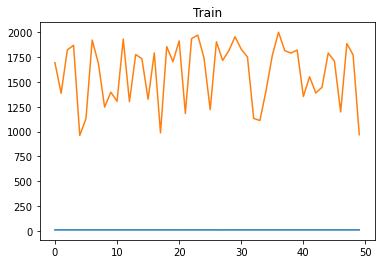

2/2 [==============================] - 2s 6ms/step


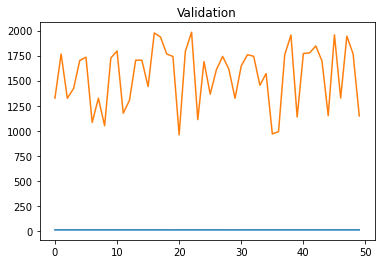

3/3 [==============================] - 0s 44ms/step


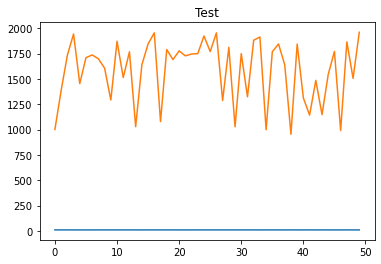

3/3 [==============================] - 0s 6ms/step


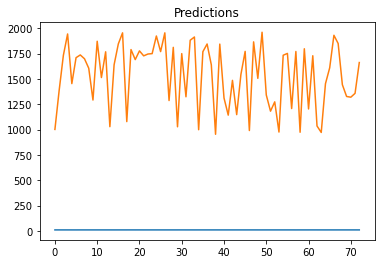

In [13]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2533230.5000 - root_mean_squared_error: 1591.6125  

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 41s 4s/step - loss: 2531193.2500 - root_mean_squared_error: 1590.9724 - val_loss: 2507810.2500 - val_root_mean_squared_error: 1583.6067
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530967.2500 - root_mean_squared_error: 1590.9014

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530967.2500 - root_mean_squared_error: 1590.9014 - val_loss: 2507695.7500 - val_root_mean_squared_error: 1583.5706
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2549503.7500 - root_mean_squared_error: 1596.7166

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530922.0000 - root_mean_squared_error: 1590.8872 - val_loss: 2507691.2500 - val_root_mean_squared_error: 1583.5691
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2522401.7500 - root_mean_squared_error: 1588.2070

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530919.5000 - root_mean_squared_error: 1590.8864 - val_loss: 2507688.7500 - val_root_mean_squared_error: 1583.5684
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2513886.5000 - root_mean_squared_error: 1585.5240

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530916.7500 - root_mean_squared_error: 1590.8855 - val_loss: 2507686.5000 - val_root_mean_squared_error: 1583.5676
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2494490.2500 - root_mean_squared_error: 1579.3955

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530914.7500 - root_mean_squared_error: 1590.8849 - val_loss: 2507683.7500 - val_root_mean_squared_error: 1583.5668
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2530912.2500 - root_mean_squared_error: 1590.8842

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530912.2500 - root_mean_squared_error: 1590.8842 - val_loss: 2507681.5000 - val_root_mean_squared_error: 1583.5660
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2517978.2500 - root_mean_squared_error: 1586.8138

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530909.7500 - root_mean_squared_error: 1590.8833 - val_loss: 2507679.0000 - val_root_mean_squared_error: 1583.5653
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2520481.5000 - root_mean_squared_error: 1587.6024

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2530907.2500 - root_mean_squared_error: 1590.8826 - val_loss: 2507676.5000 - val_root_mean_squared_error: 1583.5645
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2569729.7500 - root_mean_squared_error: 1603.0377

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2530904.5000 - root_mean_squared_error: 1590.8817 - val_loss: 2507674.0000 - val_root_mean_squared_error: 1583.5637
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2530902.5000 - root_mean_squared_error: 1590.8811

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530902.5000 - root_mean_squared_error: 1590.8811 - val_loss: 2507671.2500 - val_root_mean_squared_error: 1583.5629
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2530899.7500 - root_mean_squared_error: 1590.8801

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530899.7500 - root_mean_squared_error: 1590.8801 - val_loss: 2507669.0000 - val_root_mean_squared_error: 1583.5621
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2526788.5000 - root_mean_squared_error: 1589.5875

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530897.0000 - root_mean_squared_error: 1590.8793 - val_loss: 2507666.7500 - val_root_mean_squared_error: 1583.5614
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2522960.5000 - root_mean_squared_error: 1588.3829

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530894.7500 - root_mean_squared_error: 1590.8787 - val_loss: 2507664.0000 - val_root_mean_squared_error: 1583.5604
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2529731.5000 - root_mean_squared_error: 1590.5129

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2530892.0000 - root_mean_squared_error: 1590.8777 - val_loss: 2507661.5000 - val_root_mean_squared_error: 1583.5598
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2505524.7500 - root_mean_squared_error: 1582.8849

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2530889.7500 - root_mean_squared_error: 1590.8771 - val_loss: 2507659.0000 - val_root_mean_squared_error: 1583.5590
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2651374.0000 - root_mean_squared_error: 1628.3041

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530887.2500 - root_mean_squared_error: 1590.8762 - val_loss: 2507656.2500 - val_root_mean_squared_error: 1583.5581
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2536754.2500 - root_mean_squared_error: 1592.7191

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530884.5000 - root_mean_squared_error: 1590.8754 - val_loss: 2507654.0000 - val_root_mean_squared_error: 1583.5574
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2510759.7500 - root_mean_squared_error: 1584.5377

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2530882.2500 - root_mean_squared_error: 1590.8746 - val_loss: 2507651.2500 - val_root_mean_squared_error: 1583.5565
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2524125.7500 - root_mean_squared_error: 1588.7498

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530879.7500 - root_mean_squared_error: 1590.8739 - val_loss: 2507649.0000 - val_root_mean_squared_error: 1583.5558
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2527041.5000 - root_mean_squared_error: 1589.6671

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530877.5000 - root_mean_squared_error: 1590.8732 - val_loss: 2507646.2500 - val_root_mean_squared_error: 1583.5549
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2518988.5000 - root_mean_squared_error: 1587.1322

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530874.5000 - root_mean_squared_error: 1590.8722 - val_loss: 2507644.2500 - val_root_mean_squared_error: 1583.5543
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2539598.7500 - root_mean_squared_error: 1593.6118

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2530872.2500 - root_mean_squared_error: 1590.8716 - val_loss: 2507641.7500 - val_root_mean_squared_error: 1583.5535
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2528989.2500 - root_mean_squared_error: 1590.2797

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530869.5000 - root_mean_squared_error: 1590.8707 - val_loss: 2507639.2500 - val_root_mean_squared_error: 1583.5527
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2541271.7500 - root_mean_squared_error: 1594.1367

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530867.5000 - root_mean_squared_error: 1590.8700 - val_loss: 2507636.5000 - val_root_mean_squared_error: 1583.5519
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 2534575.2500 - root_mean_squared_error: 1592.0349

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530864.7500 - root_mean_squared_error: 1590.8691 - val_loss: 2507634.2500 - val_root_mean_squared_error: 1583.5511
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2531251.2500 - root_mean_squared_error: 1590.9906

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2530862.2500 - root_mean_squared_error: 1590.8684 - val_loss: 2507631.5000 - val_root_mean_squared_error: 1583.5504
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2530860.0000 - root_mean_squared_error: 1590.8677

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2530860.0000 - root_mean_squared_error: 1590.8677 - val_loss: 2507629.0000 - val_root_mean_squared_error: 1583.5494
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2540886.7500 - root_mean_squared_error: 1594.0159

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2530857.2500 - root_mean_squared_error: 1590.8668 - val_loss: 2507626.5000 - val_root_mean_squared_error: 1583.5487
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2530854.7500 - root_mean_squared_error: 1590.8661

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2530854.7500 - root_mean_squared_error: 1590.8661 - val_loss: 2507623.7500 - val_root_mean_squared_error: 1583.5479
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2530852.2500 - root_mean_squared_error: 1590.8652

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530852.2500 - root_mean_squared_error: 1590.8652 - val_loss: 2507621.7500 - val_root_mean_squared_error: 1583.5472
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2530849.7500 - root_mean_squared_error: 1590.8645

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2530849.7500 - root_mean_squared_error: 1590.8645 - val_loss: 2507619.0000 - val_root_mean_squared_error: 1583.5464
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2530847.2500 - root_mean_squared_error: 1590.8636

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530847.2500 - root_mean_squared_error: 1590.8636 - val_loss: 2507616.7500 - val_root_mean_squared_error: 1583.5457
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2523549.5000 - root_mean_squared_error: 1588.5684

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2530844.5000 - root_mean_squared_error: 1590.8628 - val_loss: 2507614.0000 - val_root_mean_squared_error: 1583.5448
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2514708.5000 - root_mean_squared_error: 1585.7832

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530842.2500 - root_mean_squared_error: 1590.8621 - val_loss: 2507611.7500 - val_root_mean_squared_error: 1583.5441
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2510748.0000 - root_mean_squared_error: 1584.5341

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530839.7500 - root_mean_squared_error: 1590.8613 - val_loss: 2507609.5000 - val_root_mean_squared_error: 1583.5433
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2530837.2500 - root_mean_squared_error: 1590.8606

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530837.2500 - root_mean_squared_error: 1590.8606 - val_loss: 2507606.5000 - val_root_mean_squared_error: 1583.5424
Epoch 38/50
4/8 [==============>...............] - ETA: 0s - loss: 2524307.0000 - root_mean_squared_error: 1588.8068

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2530835.0000 - root_mean_squared_error: 1590.8599 - val_loss: 2507604.5000 - val_root_mean_squared_error: 1583.5417
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2521006.2500 - root_mean_squared_error: 1587.7677

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2530832.5000 - root_mean_squared_error: 1590.8590 - val_loss: 2507602.0000 - val_root_mean_squared_error: 1583.5410
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2523436.0000 - root_mean_squared_error: 1588.5327

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2530830.5000 - root_mean_squared_error: 1590.8584 - val_loss: 2507599.2500 - val_root_mean_squared_error: 1583.5402
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2518360.5000 - root_mean_squared_error: 1586.9343

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2530827.2500 - root_mean_squared_error: 1590.8574 - val_loss: 2507597.0000 - val_root_mean_squared_error: 1583.5394
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 2564692.7500 - root_mean_squared_error: 1601.4658

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2530824.7500 - root_mean_squared_error: 1590.8566 - val_loss: 2507594.5000 - val_root_mean_squared_error: 1583.5386
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2540484.5000 - root_mean_squared_error: 1593.8898

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2530822.2500 - root_mean_squared_error: 1590.8558 - val_loss: 2507591.7500 - val_root_mean_squared_error: 1583.5377
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2515582.2500 - root_mean_squared_error: 1586.0587

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530820.2500 - root_mean_squared_error: 1590.8552 - val_loss: 2507589.5000 - val_root_mean_squared_error: 1583.5370
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2530818.0000 - root_mean_squared_error: 1590.8545

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2530818.0000 - root_mean_squared_error: 1590.8545 - val_loss: 2507586.7500 - val_root_mean_squared_error: 1583.5361
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2517403.7500 - root_mean_squared_error: 1586.6328

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2530815.2500 - root_mean_squared_error: 1590.8536 - val_loss: 2507584.5000 - val_root_mean_squared_error: 1583.5354
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2528426.0000 - root_mean_squared_error: 1590.1025

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530812.5000 - root_mean_squared_error: 1590.8528 - val_loss: 2507581.7500 - val_root_mean_squared_error: 1583.5345
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2530810.0000 - root_mean_squared_error: 1590.8519

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2530810.0000 - root_mean_squared_error: 1590.8519 - val_loss: 2507579.5000 - val_root_mean_squared_error: 1583.5338
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2562944.0000 - root_mean_squared_error: 1600.9197

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2530807.7500 - root_mean_squared_error: 1590.8513 - val_loss: 2507576.7500 - val_root_mean_squared_error: 1583.5330
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2520818.7500 - root_mean_squared_error: 1587.7086

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 8ms/step


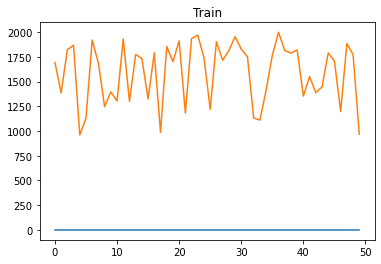

2/2 [==============================] - 2s 8ms/step


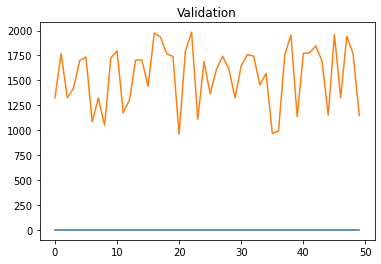

3/3 [==============================] - 0s 10ms/step


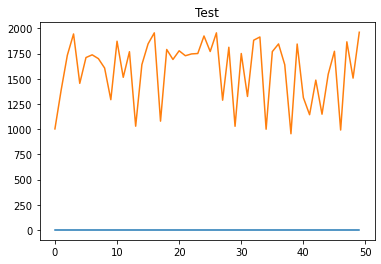

3/3 [==============================] - 0s 5ms/step


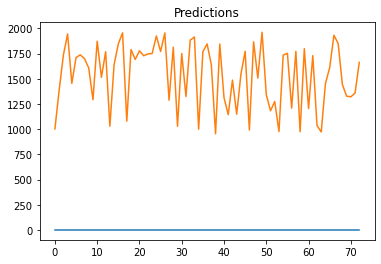

In [14]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2536306.5000 - root_mean_squared_error: 1592.5786 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 18s 2s/step - loss: 2536306.5000 - root_mean_squared_error: 1592.5786 - val_loss: 2512539.5000 - val_root_mean_squared_error: 1585.0992
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2536074.7500 - root_mean_squared_error: 1592.5059INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2535150.7500 - root_mean_squared_error: 1592.2157 - val_loss: 2511385.0000 - val_root_mean_squared_error: 1584.7350
Epoch 3/50
4/8 [==============>...............] - ETA: 0s - loss: 2520462.5000 - root_mean_squared_error: 1587.5964INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2533979.2500 - root_mean_squared_error: 1591.8478 - val_loss: 2510211.2500 - val_root_mean_squared_error: 1584.3646
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2553174.0000 - root_mean_squared_error: 1597.8655INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2532792.2500 - root_mean_squared_error: 1591.4749 - val_loss: 2509017.0000 - val_root_mean_squared_error: 1583.9877
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2521423.2500 - root_mean_squared_error: 1587.8990INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2531592.7500 - root_mean_squared_error: 1591.0980 - val_loss: 2507805.2500 - val_root_mean_squared_error: 1583.6051
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2541207.0000 - root_mean_squared_error: 1594.1163INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2530358.2500 - root_mean_squared_error: 1590.7100 - val_loss: 2506561.7500 - val_root_mean_squared_error: 1583.2125
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2529097.7500 - root_mean_squared_error: 1590.3137INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2529097.7500 - root_mean_squared_error: 1590.3137 - val_loss: 2505287.2500 - val_root_mean_squared_error: 1582.8099
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2566583.5000 - root_mean_squared_error: 1602.0560INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2527805.2500 - root_mean_squared_error: 1589.9073 - val_loss: 2503983.7500 - val_root_mean_squared_error: 1582.3981
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2529795.7500 - root_mean_squared_error: 1590.5332INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2526486.5000 - root_mean_squared_error: 1589.4926 - val_loss: 2502648.2500 - val_root_mean_squared_error: 1581.9761
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2498056.7500 - root_mean_squared_error: 1580.5242INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2525128.5000 - root_mean_squared_error: 1589.0653 - val_loss: 2501280.7500 - val_root_mean_squared_error: 1581.5438
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2523750.7500 - root_mean_squared_error: 1588.6317INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2523750.7500 - root_mean_squared_error: 1588.6317 - val_loss: 2499887.5000 - val_root_mean_squared_error: 1581.1033
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2521653.7500 - root_mean_squared_error: 1587.9716INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2522353.5000 - root_mean_squared_error: 1588.1919 - val_loss: 2498494.0000 - val_root_mean_squared_error: 1580.6625
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2520970.0000 - root_mean_squared_error: 1587.7562INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2520970.0000 - root_mean_squared_error: 1587.7562 - val_loss: 2497107.7500 - val_root_mean_squared_error: 1580.2240
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2524588.5000 - root_mean_squared_error: 1588.8954INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2519600.2500 - root_mean_squared_error: 1587.3248 - val_loss: 2495737.5000 - val_root_mean_squared_error: 1579.7903
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2518242.7500 - root_mean_squared_error: 1586.8972INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2518242.7500 - root_mean_squared_error: 1586.8972 - val_loss: 2494403.5000 - val_root_mean_squared_error: 1579.3680
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2583527.5000 - root_mean_squared_error: 1607.3356INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2516939.0000 - root_mean_squared_error: 1586.4863 - val_loss: 2493102.0000 - val_root_mean_squared_error: 1578.9559
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2524164.5000 - root_mean_squared_error: 1588.7620INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2515665.0000 - root_mean_squared_error: 1586.0848 - val_loss: 2491856.5000 - val_root_mean_squared_error: 1578.5615
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2507611.2500 - root_mean_squared_error: 1583.5439INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2514450.2500 - root_mean_squared_error: 1585.7018 - val_loss: 2490668.7500 - val_root_mean_squared_error: 1578.1853
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2513291.2500 - root_mean_squared_error: 1585.3363INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2513291.2500 - root_mean_squared_error: 1585.3363 - val_loss: 2489538.7500 - val_root_mean_squared_error: 1577.8273
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2492878.5000 - root_mean_squared_error: 1578.8853INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2512195.2500 - root_mean_squared_error: 1584.9906 - val_loss: 2488456.5000 - val_root_mean_squared_error: 1577.4841
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 2461767.5000 - root_mean_squared_error: 1569.0021INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 982ms/step - loss: 2511134.2500 - root_mean_squared_error: 1584.6559 - val_loss: 2487432.2500 - val_root_mean_squared_error: 1577.1595
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2549367.7500 - root_mean_squared_error: 1596.6740INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2510143.2500 - root_mean_squared_error: 1584.3431 - val_loss: 2486455.7500 - val_root_mean_squared_error: 1576.8500
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2483430.5000 - root_mean_squared_error: 1575.8904INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 2509192.7500 - root_mean_squared_error: 1584.0432 - val_loss: 2485542.5000 - val_root_mean_squared_error: 1576.5603
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2508310.2500 - root_mean_squared_error: 1583.7645INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 859ms/step - loss: 2508310.2500 - root_mean_squared_error: 1583.7645 - val_loss: 2484682.2500 - val_root_mean_squared_error: 1576.2875
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2526473.2500 - root_mean_squared_error: 1589.4884INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2507476.2500 - root_mean_squared_error: 1583.5012 - val_loss: 2483867.5000 - val_root_mean_squared_error: 1576.0291
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2273986.7500 - root_mean_squared_error: 1507.9744INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2506687.5000 - root_mean_squared_error: 1583.2522 - val_loss: 2483099.5000 - val_root_mean_squared_error: 1575.7854
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2505943.7500 - root_mean_squared_error: 1583.0173INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2505943.7500 - root_mean_squared_error: 1583.0173 - val_loss: 2482378.0000 - val_root_mean_squared_error: 1575.5564
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2531243.5000 - root_mean_squared_error: 1590.9882INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2505242.0000 - root_mean_squared_error: 1582.7957 - val_loss: 2481692.7500 - val_root_mean_squared_error: 1575.3390
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2504572.5000 - root_mean_squared_error: 1582.5841INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 956ms/step - loss: 2504572.5000 - root_mean_squared_error: 1582.5841 - val_loss: 2481044.2500 - val_root_mean_squared_error: 1575.1331
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2482932.7500 - root_mean_squared_error: 1575.7324INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2503939.2500 - root_mean_squared_error: 1582.3840 - val_loss: 2480424.7500 - val_root_mean_squared_error: 1574.9364
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2488292.0000 - root_mean_squared_error: 1577.4321INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2503337.0000 - root_mean_squared_error: 1582.1937 - val_loss: 2479832.5000 - val_root_mean_squared_error: 1574.7484
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2468234.0000 - root_mean_squared_error: 1571.0614INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 847ms/step - loss: 2502757.5000 - root_mean_squared_error: 1582.0106 - val_loss: 2479265.7500 - val_root_mean_squared_error: 1574.5685
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2480214.2500 - root_mean_squared_error: 1574.8696INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2502202.7500 - root_mean_squared_error: 1581.8352 - val_loss: 2478724.7500 - val_root_mean_squared_error: 1574.3966
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2506510.0000 - root_mean_squared_error: 1583.1962INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2501675.2500 - root_mean_squared_error: 1581.6685 - val_loss: 2478206.0000 - val_root_mean_squared_error: 1574.2319
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 2461344.5000 - root_mean_squared_error: 1568.8673INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2501166.7500 - root_mean_squared_error: 1581.5077 - val_loss: 2477706.5000 - val_root_mean_squared_error: 1574.0732
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2459046.7500 - root_mean_squared_error: 1568.1348INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500676.2500 - root_mean_squared_error: 1581.3527 - val_loss: 2477223.7500 - val_root_mean_squared_error: 1573.9199
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2507090.7500 - root_mean_squared_error: 1583.3795INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500203.5000 - root_mean_squared_error: 1581.2031 - val_loss: 2476759.0000 - val_root_mean_squared_error: 1573.7723
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2499747.2500 - root_mean_squared_error: 1581.0590INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499747.2500 - root_mean_squared_error: 1581.0590 - val_loss: 2476309.0000 - val_root_mean_squared_error: 1573.6293
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2505063.5000 - root_mean_squared_error: 1582.7393INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499305.0000 - root_mean_squared_error: 1580.9191 - val_loss: 2475867.5000 - val_root_mean_squared_error: 1573.4890
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2467127.2500 - root_mean_squared_error: 1570.7091INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 947ms/step - loss: 2498868.0000 - root_mean_squared_error: 1580.7808 - val_loss: 2475439.7500 - val_root_mean_squared_error: 1573.3530
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2499789.7500 - root_mean_squared_error: 1581.0724INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 906ms/step - loss: 2498447.0000 - root_mean_squared_error: 1580.6477 - val_loss: 2475016.2500 - val_root_mean_squared_error: 1573.2184
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 2560995.2500 - root_mean_squared_error: 1600.3110INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 997ms/step - loss: 2498029.7500 - root_mean_squared_error: 1580.5156 - val_loss: 2474602.0000 - val_root_mean_squared_error: 1573.0868
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2568490.0000 - root_mean_squared_error: 1602.6509INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2497620.2500 - root_mean_squared_error: 1580.3861 - val_loss: 2474191.0000 - val_root_mean_squared_error: 1572.9562
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2776884.0000 - root_mean_squared_error: 1666.3986INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2497210.0000 - root_mean_squared_error: 1580.2563 - val_loss: 2473781.0000 - val_root_mean_squared_error: 1572.8258
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 2543025.5000 - root_mean_squared_error: 1594.6866INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2496799.2500 - root_mean_squared_error: 1580.1263 - val_loss: 2473367.7500 - val_root_mean_squared_error: 1572.6945
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2518231.7500 - root_mean_squared_error: 1586.8938INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2496385.5000 - root_mean_squared_error: 1579.9954 - val_loss: 2472950.0000 - val_root_mean_squared_error: 1572.5616
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2510595.7500 - root_mean_squared_error: 1584.4860INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2495966.2500 - root_mean_squared_error: 1579.8627 - val_loss: 2472528.5000 - val_root_mean_squared_error: 1572.4276
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2507406.7500 - root_mean_squared_error: 1583.4794INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2495547.2500 - root_mean_squared_error: 1579.7301 - val_loss: 2472107.7500 - val_root_mean_squared_error: 1572.2938
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2490482.7500 - root_mean_squared_error: 1578.1263INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 829ms/step - loss: 2495129.0000 - root_mean_squared_error: 1579.5978 - val_loss: 2471695.0000 - val_root_mean_squared_error: 1572.1625
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2494720.5000 - root_mean_squared_error: 1579.4684INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 6ms/step


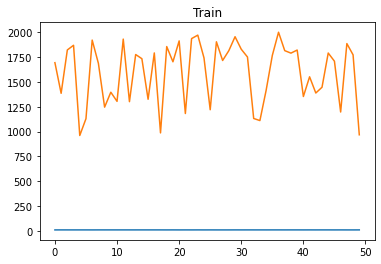

2/2 [==============================] - 1s 4ms/step


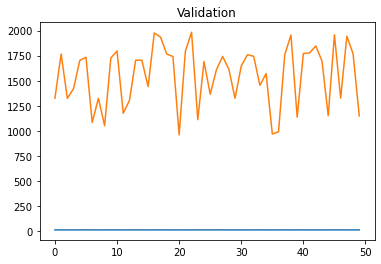

3/3 [==============================] - 0s 29ms/step


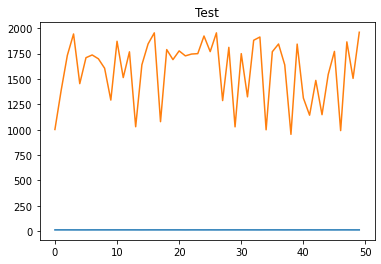

3/3 [==============================] - 0s 4ms/step


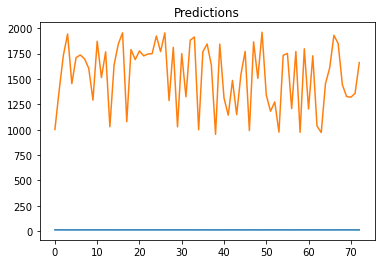

In [15]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [16]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2528553.0000 - root_mean_squared_error: 1590.1425 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 664ms/step - loss: 2528553.0000 - root_mean_squared_error: 1590.1425 - val_loss: 2501147.7500 - val_root_mean_squared_error: 1581.5017
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2476232.5000 - root_mean_squared_error: 1573.6050

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 2524226.5000 - root_mean_squared_error: 1588.7815 - val_loss: 2497045.0000 - val_root_mean_squared_error: 1580.2041
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2520186.5000 - root_mean_squared_error: 1587.5095

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 469ms/step - loss: 2520186.5000 - root_mean_squared_error: 1587.5095 - val_loss: 2492887.0000 - val_root_mean_squared_error: 1578.8879
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2572567.5000 - root_mean_squared_error: 1603.9225

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2516128.7500 - root_mean_squared_error: 1586.2310 - val_loss: 2488672.2500 - val_root_mean_squared_error: 1577.5526
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2497196.0000 - root_mean_squared_error: 1580.2518

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 501ms/step - loss: 2511962.0000 - root_mean_squared_error: 1584.9170 - val_loss: 2484414.2500 - val_root_mean_squared_error: 1576.2025
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2507798.7500 - root_mean_squared_error: 1583.6031

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 2507798.7500 - root_mean_squared_error: 1583.6031 - val_loss: 2480072.5000 - val_root_mean_squared_error: 1574.8246
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2484982.7500 - root_mean_squared_error: 1576.3828

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 773ms/step - loss: 2503517.0000 - root_mean_squared_error: 1582.2506 - val_loss: 2475669.5000 - val_root_mean_squared_error: 1573.4261
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2542343.7500 - root_mean_squared_error: 1594.4729

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 579ms/step - loss: 2499180.7500 - root_mean_squared_error: 1580.8798 - val_loss: 2471166.0000 - val_root_mean_squared_error: 1571.9943
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2493087.7500 - root_mean_squared_error: 1578.9514

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2494732.5000 - root_mean_squared_error: 1579.4722 - val_loss: 2466579.2500 - val_root_mean_squared_error: 1570.5347
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2492838.0000 - root_mean_squared_error: 1578.8724

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 2490212.0000 - root_mean_squared_error: 1578.0405 - val_loss: 2461864.7500 - val_root_mean_squared_error: 1569.0331
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2480800.0000 - root_mean_squared_error: 1575.0555

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 480ms/step - loss: 2485558.5000 - root_mean_squared_error: 1576.5654 - val_loss: 2457064.7500 - val_root_mean_squared_error: 1567.5027
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2622992.7500 - root_mean_squared_error: 1619.5656

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 2480827.2500 - root_mean_squared_error: 1575.0642 - val_loss: 2452122.5000 - val_root_mean_squared_error: 1565.9254
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2514324.0000 - root_mean_squared_error: 1585.6620

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 677ms/step - loss: 2475923.7500 - root_mean_squared_error: 1573.5068 - val_loss: 2447035.5000 - val_root_mean_squared_error: 1564.3003
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2457309.7500 - root_mean_squared_error: 1567.5808

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 497ms/step - loss: 2470860.7500 - root_mean_squared_error: 1571.8972 - val_loss: 2441796.5000 - val_root_mean_squared_error: 1562.6250
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2445778.5000 - root_mean_squared_error: 1563.8984

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 585ms/step - loss: 2465697.5000 - root_mean_squared_error: 1570.2539 - val_loss: 2436366.2500 - val_root_mean_squared_error: 1560.8864
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2446046.2500 - root_mean_squared_error: 1563.9841

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 2460316.5000 - root_mean_squared_error: 1568.5396 - val_loss: 2430765.7500 - val_root_mean_squared_error: 1559.0913
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2464350.7500 - root_mean_squared_error: 1569.8251

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 877ms/step - loss: 2454797.5000 - root_mean_squared_error: 1566.7793 - val_loss: 2425002.2500 - val_root_mean_squared_error: 1557.2418
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2520776.0000 - root_mean_squared_error: 1587.6952

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 513ms/step - loss: 2449112.7500 - root_mean_squared_error: 1564.9641 - val_loss: 2419121.0000 - val_root_mean_squared_error: 1555.3524
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2443280.2500 - root_mean_squared_error: 1563.0996

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 2443280.2500 - root_mean_squared_error: 1563.0996 - val_loss: 2413079.2500 - val_root_mean_squared_error: 1553.4089
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2454736.7500 - root_mean_squared_error: 1566.7600

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 418ms/step - loss: 2437286.2500 - root_mean_squared_error: 1561.1810 - val_loss: 2406891.5000 - val_root_mean_squared_error: 1551.4160
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2393776.7500 - root_mean_squared_error: 1547.1835

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 2431182.2500 - root_mean_squared_error: 1559.2249 - val_loss: 2400499.7500 - val_root_mean_squared_error: 1549.3546
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2355987.0000 - root_mean_squared_error: 1534.9225

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 594ms/step - loss: 2424886.0000 - root_mean_squared_error: 1557.2046 - val_loss: 2393978.5000 - val_root_mean_squared_error: 1547.2488
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2397895.7500 - root_mean_squared_error: 1548.5140

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 278ms/step - loss: 2418401.7500 - root_mean_squared_error: 1555.1211 - val_loss: 2387231.5000 - val_root_mean_squared_error: 1545.0668
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2411715.7500 - root_mean_squared_error: 1552.9700

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 387ms/step - loss: 2411715.7500 - root_mean_squared_error: 1552.9700 - val_loss: 2380273.0000 - val_root_mean_squared_error: 1542.8134
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2389708.7500 - root_mean_squared_error: 1545.8683

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2404824.0000 - root_mean_squared_error: 1550.7495 - val_loss: 2373048.2500 - val_root_mean_squared_error: 1540.4702
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2396820.0000 - root_mean_squared_error: 1548.1666

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 2397644.5000 - root_mean_squared_error: 1548.4329 - val_loss: 2365584.5000 - val_root_mean_squared_error: 1538.0457
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2529234.0000 - root_mean_squared_error: 1590.3566

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 585ms/step - loss: 2390265.0000 - root_mean_squared_error: 1546.0482 - val_loss: 2357914.7500 - val_root_mean_squared_error: 1535.5503
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2372099.5000 - root_mean_squared_error: 1540.1621

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 429ms/step - loss: 2379883.0000 - root_mean_squared_error: 1542.6869 - val_loss: 2339724.7500 - val_root_mean_squared_error: 1529.6158
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2303018.0000 - root_mean_squared_error: 1517.5698

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 391ms/step - loss: 2358867.2500 - root_mean_squared_error: 1535.8605 - val_loss: 2315965.2500 - val_root_mean_squared_error: 1521.8295
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2233015.5000 - root_mean_squared_error: 1494.3278

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 383ms/step - loss: 2335390.5000 - root_mean_squared_error: 1528.1985 - val_loss: 2292126.0000 - val_root_mean_squared_error: 1513.9769
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2306918.7500 - root_mean_squared_error: 1518.8544

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 410ms/step - loss: 2312202.5000 - root_mean_squared_error: 1520.5928 - val_loss: 2268703.0000 - val_root_mean_squared_error: 1506.2214
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2288581.7500 - root_mean_squared_error: 1512.8059

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 501ms/step - loss: 2289584.0000 - root_mean_squared_error: 1513.1371 - val_loss: 2245685.7500 - val_root_mean_squared_error: 1498.5613
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2267100.0000 - root_mean_squared_error: 1505.6892

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 549ms/step - loss: 2267100.0000 - root_mean_squared_error: 1505.6892 - val_loss: 2223176.0000 - val_root_mean_squared_error: 1491.0319
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2245175.0000 - root_mean_squared_error: 1498.3907

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 781ms/step - loss: 2245175.0000 - root_mean_squared_error: 1498.3907 - val_loss: 2201010.5000 - val_root_mean_squared_error: 1483.5803
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2200625.7500 - root_mean_squared_error: 1483.4507

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 305ms/step - loss: 2223367.2500 - root_mean_squared_error: 1491.0959 - val_loss: 2178904.5000 - val_root_mean_squared_error: 1476.1113
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2245012.7500 - root_mean_squared_error: 1498.3367

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 494ms/step - loss: 2201636.7500 - root_mean_squared_error: 1483.7914 - val_loss: 2156513.7500 - val_root_mean_squared_error: 1468.5073
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2162677.0000 - root_mean_squared_error: 1470.6042

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 735ms/step - loss: 2179647.2500 - root_mean_squared_error: 1476.3628 - val_loss: 2134075.2500 - val_root_mean_squared_error: 1460.8474
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2139190.7500 - root_mean_squared_error: 1462.5973

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 582ms/step - loss: 2157518.5000 - root_mean_squared_error: 1468.8494 - val_loss: 2111673.0000 - val_root_mean_squared_error: 1453.1597
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2123990.7500 - root_mean_squared_error: 1457.3917

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 2135575.2500 - root_mean_squared_error: 1461.3607 - val_loss: 2088930.8750 - val_root_mean_squared_error: 1445.3135
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2113216.2500 - root_mean_squared_error: 1453.6906

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 2113216.2500 - root_mean_squared_error: 1453.6906 - val_loss: 2066042.7500 - val_root_mean_squared_error: 1437.3735
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2068301.5000 - root_mean_squared_error: 1438.1591

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 2090533.2500 - root_mean_squared_error: 1445.8677 - val_loss: 2043060.8750 - val_root_mean_squared_error: 1429.3568
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2068030.1250 - root_mean_squared_error: 1438.0647

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 722ms/step - loss: 2068030.1250 - root_mean_squared_error: 1438.0647 - val_loss: 2020101.1250 - val_root_mean_squared_error: 1421.3026
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2057355.0000 - root_mean_squared_error: 1434.3483

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2045441.1250 - root_mean_squared_error: 1430.1892 - val_loss: 1996880.5000 - val_root_mean_squared_error: 1413.1102
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2017364.5000 - root_mean_squared_error: 1420.3396

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 737ms/step - loss: 2022547.2500 - root_mean_squared_error: 1422.1628 - val_loss: 1973718.6250 - val_root_mean_squared_error: 1404.8910
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 2031521.2500 - root_mean_squared_error: 1425.3145

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 602ms/step - loss: 1999742.8750 - root_mean_squared_error: 1414.1227 - val_loss: 1950158.3750 - val_root_mean_squared_error: 1396.4807
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 1957761.7500 - root_mean_squared_error: 1399.2004

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 554ms/step - loss: 1976434.5000 - root_mean_squared_error: 1405.8572 - val_loss: 1926553.6250 - val_root_mean_squared_error: 1388.0034
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 1871888.7500 - root_mean_squared_error: 1368.1698

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 634ms/step - loss: 1953052.1250 - root_mean_squared_error: 1397.5164 - val_loss: 1902698.2500 - val_root_mean_squared_error: 1379.3833
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 1933115.7500 - root_mean_squared_error: 1390.3654

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 524ms/step - loss: 1929593.7500 - root_mean_squared_error: 1389.0981 - val_loss: 1878445.5000 - val_root_mean_squared_error: 1370.5640
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 1908088.0000 - root_mean_squared_error: 1381.3356

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 366ms/step - loss: 1905567.5000 - root_mean_squared_error: 1380.4230 - val_loss: 1854256.2500 - val_root_mean_squared_error: 1361.7108
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 1780234.7500 - root_mean_squared_error: 1334.2544

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 9ms/step


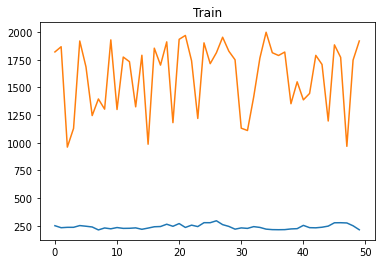

2/2 [==============================] - 0s 4ms/step


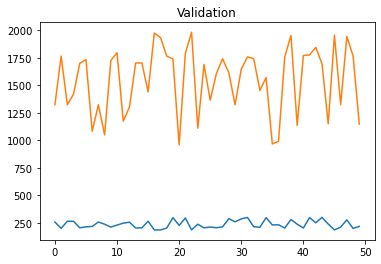

3/3 [==============================] - 0s 4ms/step


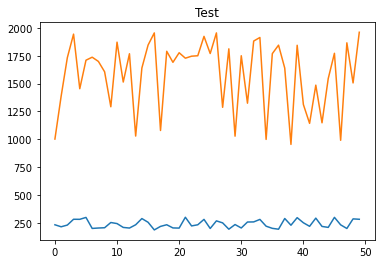

3/3 [==============================] - 0s 3ms/step


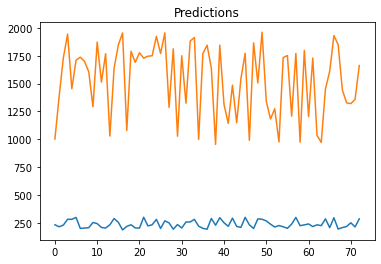

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2507732.2500 - root_mean_squared_error: 1583.5822

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 38s 4s/step - loss: 2532799.2500 - root_mean_squared_error: 1591.4771 - val_loss: 2507989.7500 - val_root_mean_squared_error: 1583.6635
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2541243.2500 - root_mean_squared_error: 1594.1277

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2532213.7500 - root_mean_squared_error: 1591.2931 - val_loss: 2507413.7500 - val_root_mean_squared_error: 1583.4816
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2531633.2500 - root_mean_squared_error: 1591.1107

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2531633.2500 - root_mean_squared_error: 1591.1107 - val_loss: 2506844.7500 - val_root_mean_squared_error: 1583.3019
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2531058.7500 - root_mean_squared_error: 1590.9302

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2531058.7500 - root_mean_squared_error: 1590.9302 - val_loss: 2506274.7500 - val_root_mean_squared_error: 1583.1218
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2530043.2500 - root_mean_squared_error: 1590.6110

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2530484.2500 - root_mean_squared_error: 1590.7496 - val_loss: 2505700.7500 - val_root_mean_squared_error: 1582.9406
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2529903.2500 - root_mean_squared_error: 1590.5670

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2529903.2500 - root_mean_squared_error: 1590.5670 - val_loss: 2505122.2500 - val_root_mean_squared_error: 1582.7577
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2546756.5000 - root_mean_squared_error: 1595.8561

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2529314.0000 - root_mean_squared_error: 1590.3817 - val_loss: 2504535.2500 - val_root_mean_squared_error: 1582.5724
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2528715.7500 - root_mean_squared_error: 1590.1936

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2528715.7500 - root_mean_squared_error: 1590.1936 - val_loss: 2503941.2500 - val_root_mean_squared_error: 1582.3846
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2508590.2500 - root_mean_squared_error: 1583.8530

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2528109.0000 - root_mean_squared_error: 1590.0028 - val_loss: 2503330.7500 - val_root_mean_squared_error: 1582.1918
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2591391.7500 - root_mean_squared_error: 1609.7800

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2527485.0000 - root_mean_squared_error: 1589.8066 - val_loss: 2502693.0000 - val_root_mean_squared_error: 1581.9902
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2562497.0000 - root_mean_squared_error: 1600.7802

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2526834.7500 - root_mean_squared_error: 1589.6021 - val_loss: 2502037.5000 - val_root_mean_squared_error: 1581.7830
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2526161.5000 - root_mean_squared_error: 1589.3903

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2526161.5000 - root_mean_squared_error: 1589.3903 - val_loss: 2501363.2500 - val_root_mean_squared_error: 1581.5698
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2535670.0000 - root_mean_squared_error: 1592.3788

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2525471.2500 - root_mean_squared_error: 1589.1731 - val_loss: 2500663.7500 - val_root_mean_squared_error: 1581.3488
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2545817.7500 - root_mean_squared_error: 1595.5619

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2524755.0000 - root_mean_squared_error: 1588.9478 - val_loss: 2499940.7500 - val_root_mean_squared_error: 1581.1201
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2535212.0000 - root_mean_squared_error: 1592.2349

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2524015.7500 - root_mean_squared_error: 1588.7151 - val_loss: 2499188.5000 - val_root_mean_squared_error: 1580.8822
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2523249.2500 - root_mean_squared_error: 1588.4739

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2523249.2500 - root_mean_squared_error: 1588.4739 - val_loss: 2498411.2500 - val_root_mean_squared_error: 1580.6364
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2517713.2500 - root_mean_squared_error: 1586.7303

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2522453.7500 - root_mean_squared_error: 1588.2235 - val_loss: 2497608.5000 - val_root_mean_squared_error: 1580.3824
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2500248.5000 - root_mean_squared_error: 1581.2174

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2521630.5000 - root_mean_squared_error: 1587.9642 - val_loss: 2496778.7500 - val_root_mean_squared_error: 1580.1199
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2520784.0000 - root_mean_squared_error: 1587.6978

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2520784.0000 - root_mean_squared_error: 1587.6978 - val_loss: 2495914.2500 - val_root_mean_squared_error: 1579.8463
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2526346.7500 - root_mean_squared_error: 1589.4486

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2519906.7500 - root_mean_squared_error: 1587.4214 - val_loss: 2495026.7500 - val_root_mean_squared_error: 1579.5653
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2519009.7500 - root_mean_squared_error: 1587.1389

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2519009.7500 - root_mean_squared_error: 1587.1389 - val_loss: 2494123.7500 - val_root_mean_squared_error: 1579.2797
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2512959.5000 - root_mean_squared_error: 1585.2317

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2518092.5000 - root_mean_squared_error: 1586.8499 - val_loss: 2493207.7500 - val_root_mean_squared_error: 1578.9895
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2501290.2500 - root_mean_squared_error: 1581.5468

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2517164.2500 - root_mean_squared_error: 1586.5574 - val_loss: 2492269.7500 - val_root_mean_squared_error: 1578.6924
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2516216.7500 - root_mean_squared_error: 1586.2587

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2516216.7500 - root_mean_squared_error: 1586.2587 - val_loss: 2491314.2500 - val_root_mean_squared_error: 1578.3899
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2515258.7500 - root_mean_squared_error: 1585.9568

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2515258.7500 - root_mean_squared_error: 1585.9568 - val_loss: 2490359.2500 - val_root_mean_squared_error: 1578.0872
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2508710.2500 - root_mean_squared_error: 1583.8909

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2514293.5000 - root_mean_squared_error: 1585.6523 - val_loss: 2489405.2500 - val_root_mean_squared_error: 1577.7849
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2521949.7500 - root_mean_squared_error: 1588.0648

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2513341.2500 - root_mean_squared_error: 1585.3521 - val_loss: 2488447.7500 - val_root_mean_squared_error: 1577.4814
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2526966.5000 - root_mean_squared_error: 1589.6436

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2512388.2500 - root_mean_squared_error: 1585.0515 - val_loss: 2487503.2500 - val_root_mean_squared_error: 1577.1820
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2478284.2500 - root_mean_squared_error: 1574.2567

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2511445.0000 - root_mean_squared_error: 1584.7539 - val_loss: 2486572.7500 - val_root_mean_squared_error: 1576.8871
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2500246.7500 - root_mean_squared_error: 1581.2168

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2510525.5000 - root_mean_squared_error: 1584.4637 - val_loss: 2485652.2500 - val_root_mean_squared_error: 1576.5951
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2521899.0000 - root_mean_squared_error: 1588.0488

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2509612.2500 - root_mean_squared_error: 1584.1755 - val_loss: 2484754.0000 - val_root_mean_squared_error: 1576.3103
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2508722.2500 - root_mean_squared_error: 1583.8947

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2508722.2500 - root_mean_squared_error: 1583.8947 - val_loss: 2483887.5000 - val_root_mean_squared_error: 1576.0354
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2544274.2500 - root_mean_squared_error: 1595.0781

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2507877.2500 - root_mean_squared_error: 1583.6279 - val_loss: 2483049.7500 - val_root_mean_squared_error: 1575.7697
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2493120.5000 - root_mean_squared_error: 1578.9618

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2507051.2500 - root_mean_squared_error: 1583.3671 - val_loss: 2482248.7500 - val_root_mean_squared_error: 1575.5154
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2493068.7500 - root_mean_squared_error: 1578.9454

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2506263.0000 - root_mean_squared_error: 1583.1182 - val_loss: 2481472.7500 - val_root_mean_squared_error: 1575.2690
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2581324.5000 - root_mean_squared_error: 1606.6501

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2505506.0000 - root_mean_squared_error: 1582.8790 - val_loss: 2480728.2500 - val_root_mean_squared_error: 1575.0328
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2505397.2500 - root_mean_squared_error: 1582.8447

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2504779.7500 - root_mean_squared_error: 1582.6497 - val_loss: 2480021.5000 - val_root_mean_squared_error: 1574.8083
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2504086.7500 - root_mean_squared_error: 1582.4307

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2504086.7500 - root_mean_squared_error: 1582.4307 - val_loss: 2479353.5000 - val_root_mean_squared_error: 1574.5963
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2517246.0000 - root_mean_squared_error: 1586.5831

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2503438.7500 - root_mean_squared_error: 1582.2258 - val_loss: 2478719.2500 - val_root_mean_squared_error: 1574.3949
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2550841.7500 - root_mean_squared_error: 1597.1355

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2502818.7500 - root_mean_squared_error: 1582.0299 - val_loss: 2478112.2500 - val_root_mean_squared_error: 1574.2021
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2502224.2500 - root_mean_squared_error: 1581.8420

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2502224.2500 - root_mean_squared_error: 1581.8420 - val_loss: 2477535.0000 - val_root_mean_squared_error: 1574.0188
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2498555.0000 - root_mean_squared_error: 1580.6818

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2501658.2500 - root_mean_squared_error: 1581.6631 - val_loss: 2476982.0000 - val_root_mean_squared_error: 1573.8430
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2514174.2500 - root_mean_squared_error: 1585.6147

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2501119.0000 - root_mean_squared_error: 1581.4927 - val_loss: 2476456.7500 - val_root_mean_squared_error: 1573.6761
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2510326.2500 - root_mean_squared_error: 1584.4009

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2500609.5000 - root_mean_squared_error: 1581.3315 - val_loss: 2475959.7500 - val_root_mean_squared_error: 1573.5183
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2500124.7500 - root_mean_squared_error: 1581.1782

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2500124.7500 - root_mean_squared_error: 1581.1782 - val_loss: 2475486.2500 - val_root_mean_squared_error: 1573.3678
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2502178.2500 - root_mean_squared_error: 1581.8275

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2499663.2500 - root_mean_squared_error: 1581.0323 - val_loss: 2475032.7500 - val_root_mean_squared_error: 1573.2236
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2499219.0000 - root_mean_squared_error: 1580.8918

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2499219.0000 - root_mean_squared_error: 1580.8918 - val_loss: 2474602.7500 - val_root_mean_squared_error: 1573.0870
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2502800.0000 - root_mean_squared_error: 1582.0240

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2498800.7500 - root_mean_squared_error: 1580.7595 - val_loss: 2474192.0000 - val_root_mean_squared_error: 1572.9564
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2486762.5000 - root_mean_squared_error: 1576.9473

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2498399.5000 - root_mean_squared_error: 1580.6326 - val_loss: 2473799.2500 - val_root_mean_squared_error: 1572.8315
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2498015.2500 - root_mean_squared_error: 1580.5111

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 6ms/step


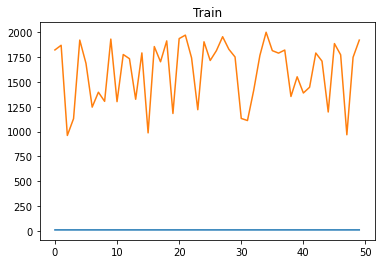

2/2 [==============================] - 1s 8ms/step


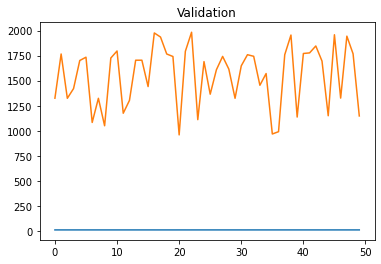

3/3 [==============================] - 0s 9ms/step


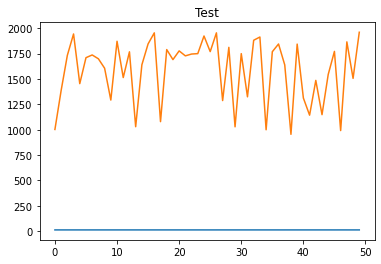

3/3 [==============================] - 0s 5ms/step


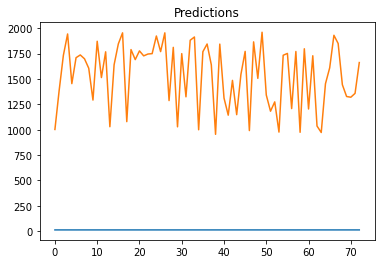

In [18]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2548719.5000 - root_mean_squared_error: 1596.4709

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 41s 4s/step - loss: 2533438.2500 - root_mean_squared_error: 1591.6779 - val_loss: 2508793.0000 - val_root_mean_squared_error: 1583.9170
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2533090.7500 - root_mean_squared_error: 1591.5686

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2533090.7500 - root_mean_squared_error: 1591.5686 - val_loss: 2508465.7500 - val_root_mean_squared_error: 1583.8137
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2532769.0000 - root_mean_squared_error: 1591.4675

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2532769.0000 - root_mean_squared_error: 1591.4675 - val_loss: 2508138.7500 - val_root_mean_squared_error: 1583.7104
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2532436.0000 - root_mean_squared_error: 1591.3629

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2532436.0000 - root_mean_squared_error: 1591.3629 - val_loss: 2507826.2500 - val_root_mean_squared_error: 1583.6118
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2550777.2500 - root_mean_squared_error: 1597.1152

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2532167.2500 - root_mean_squared_error: 1591.2784 - val_loss: 2507635.2500 - val_root_mean_squared_error: 1583.5515
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2531982.7500 - root_mean_squared_error: 1591.2206

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2531982.7500 - root_mean_squared_error: 1591.2206 - val_loss: 2507447.2500 - val_root_mean_squared_error: 1583.4921
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2540510.2500 - root_mean_squared_error: 1593.8978

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2531791.2500 - root_mean_squared_error: 1591.1604 - val_loss: 2507256.0000 - val_root_mean_squared_error: 1583.4318
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2531597.2500 - root_mean_squared_error: 1591.0994

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2531597.2500 - root_mean_squared_error: 1591.0994 - val_loss: 2507064.7500 - val_root_mean_squared_error: 1583.3713
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2555994.2500 - root_mean_squared_error: 1598.7477

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2531404.0000 - root_mean_squared_error: 1591.0387 - val_loss: 2506866.0000 - val_root_mean_squared_error: 1583.3086
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2531203.0000 - root_mean_squared_error: 1590.9755

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2531203.0000 - root_mean_squared_error: 1590.9755 - val_loss: 2506665.7500 - val_root_mean_squared_error: 1583.2454
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2530753.2500 - root_mean_squared_error: 1590.8341

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2531000.7500 - root_mean_squared_error: 1590.9119 - val_loss: 2506458.7500 - val_root_mean_squared_error: 1583.1799
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2530789.2500 - root_mean_squared_error: 1590.8455

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2530789.2500 - root_mean_squared_error: 1590.8455 - val_loss: 2506254.2500 - val_root_mean_squared_error: 1583.1154
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2535924.5000 - root_mean_squared_error: 1592.4586

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2530586.5000 - root_mean_squared_error: 1590.7817 - val_loss: 2506087.7500 - val_root_mean_squared_error: 1583.0627
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2539190.0000 - root_mean_squared_error: 1593.4836

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530446.0000 - root_mean_squared_error: 1590.7375 - val_loss: 2505945.0000 - val_root_mean_squared_error: 1583.0177
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2530307.7500 - root_mean_squared_error: 1590.6941

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2530307.7500 - root_mean_squared_error: 1590.6941 - val_loss: 2505794.2500 - val_root_mean_squared_error: 1582.9701
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2530160.0000 - root_mean_squared_error: 1590.6477

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2530160.0000 - root_mean_squared_error: 1590.6477 - val_loss: 2505633.0000 - val_root_mean_squared_error: 1582.9192
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2529998.2500 - root_mean_squared_error: 1590.5968

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2529998.2500 - root_mean_squared_error: 1590.5968 - val_loss: 2505470.2500 - val_root_mean_squared_error: 1582.8677
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2592765.5000 - root_mean_squared_error: 1610.2067

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2529829.0000 - root_mean_squared_error: 1590.5436 - val_loss: 2505296.7500 - val_root_mean_squared_error: 1582.8129
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2529646.0000 - root_mean_squared_error: 1590.4861

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2529646.0000 - root_mean_squared_error: 1590.4861 - val_loss: 2505103.7500 - val_root_mean_squared_error: 1582.7518
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2526183.7500 - root_mean_squared_error: 1589.3973

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2529450.5000 - root_mean_squared_error: 1590.4247 - val_loss: 2504898.2500 - val_root_mean_squared_error: 1582.6870
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2528134.7500 - root_mean_squared_error: 1590.0110

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2529238.7500 - root_mean_squared_error: 1590.3580 - val_loss: 2504679.2500 - val_root_mean_squared_error: 1582.6178
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2530423.7500 - root_mean_squared_error: 1590.7306

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2529013.5000 - root_mean_squared_error: 1590.2872 - val_loss: 2504443.7500 - val_root_mean_squared_error: 1582.5435
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2509306.2500 - root_mean_squared_error: 1584.0790

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2528771.7500 - root_mean_squared_error: 1590.2112 - val_loss: 2504195.5000 - val_root_mean_squared_error: 1582.4651
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2514838.5000 - root_mean_squared_error: 1585.8242

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2528518.2500 - root_mean_squared_error: 1590.1315 - val_loss: 2503935.7500 - val_root_mean_squared_error: 1582.3829
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2528250.7500 - root_mean_squared_error: 1590.0474

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2528250.7500 - root_mean_squared_error: 1590.0474 - val_loss: 2503659.7500 - val_root_mean_squared_error: 1582.2958
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2536226.0000 - root_mean_squared_error: 1592.5533

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2527969.5000 - root_mean_squared_error: 1589.9590 - val_loss: 2503371.7500 - val_root_mean_squared_error: 1582.2047
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2488220.2500 - root_mean_squared_error: 1577.4093

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2527670.7500 - root_mean_squared_error: 1589.8650 - val_loss: 2503066.2500 - val_root_mean_squared_error: 1582.1082
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2567344.2500 - root_mean_squared_error: 1602.2935

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2527356.2500 - root_mean_squared_error: 1589.7661 - val_loss: 2502735.5000 - val_root_mean_squared_error: 1582.0037
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2527014.7500 - root_mean_squared_error: 1589.6587

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2527014.7500 - root_mean_squared_error: 1589.6587 - val_loss: 2502386.7500 - val_root_mean_squared_error: 1581.8934
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2526652.0000 - root_mean_squared_error: 1589.5446

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2526652.0000 - root_mean_squared_error: 1589.5446 - val_loss: 2502018.7500 - val_root_mean_squared_error: 1581.7771
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2526274.2500 - root_mean_squared_error: 1589.4258

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2526274.2500 - root_mean_squared_error: 1589.4258 - val_loss: 2501629.7500 - val_root_mean_squared_error: 1581.6542
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2525873.2500 - root_mean_squared_error: 1589.2996

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2525873.2500 - root_mean_squared_error: 1589.2996 - val_loss: 2501230.2500 - val_root_mean_squared_error: 1581.5278
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2533206.5000 - root_mean_squared_error: 1591.6050

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2525468.2500 - root_mean_squared_error: 1589.1722 - val_loss: 2500826.5000 - val_root_mean_squared_error: 1581.4001
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2552936.2500 - root_mean_squared_error: 1597.7910

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2525063.5000 - root_mean_squared_error: 1589.0448 - val_loss: 2500431.0000 - val_root_mean_squared_error: 1581.2751
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2520479.7500 - root_mean_squared_error: 1587.6019

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2524668.0000 - root_mean_squared_error: 1588.9204 - val_loss: 2500045.2500 - val_root_mean_squared_error: 1581.1532
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2439349.2500 - root_mean_squared_error: 1561.8417

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2524285.0000 - root_mean_squared_error: 1588.7998 - val_loss: 2499675.5000 - val_root_mean_squared_error: 1581.0363
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2513533.2500 - root_mean_squared_error: 1585.4126

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2523924.5000 - root_mean_squared_error: 1588.6864 - val_loss: 2499322.5000 - val_root_mean_squared_error: 1580.9246
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2523578.7500 - root_mean_squared_error: 1588.5776

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2523578.7500 - root_mean_squared_error: 1588.5776 - val_loss: 2498982.0000 - val_root_mean_squared_error: 1580.8169
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2551463.0000 - root_mean_squared_error: 1597.3300

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2523245.0000 - root_mean_squared_error: 1588.4725 - val_loss: 2498651.5000 - val_root_mean_squared_error: 1580.7123
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2516373.7500 - root_mean_squared_error: 1586.3082

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2522918.7500 - root_mean_squared_error: 1588.3699 - val_loss: 2498333.7500 - val_root_mean_squared_error: 1580.6118
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2512147.0000 - root_mean_squared_error: 1584.9753

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2522606.0000 - root_mean_squared_error: 1588.2714 - val_loss: 2498019.7500 - val_root_mean_squared_error: 1580.5125
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2522295.2500 - root_mean_squared_error: 1588.1736

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2522295.2500 - root_mean_squared_error: 1588.1736 - val_loss: 2497710.2500 - val_root_mean_squared_error: 1580.4146
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2521991.5000 - root_mean_squared_error: 1588.0779

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2521991.5000 - root_mean_squared_error: 1588.0779 - val_loss: 2497411.5000 - val_root_mean_squared_error: 1580.3201
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2504028.0000 - root_mean_squared_error: 1582.4121

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2521697.0000 - root_mean_squared_error: 1587.9852 - val_loss: 2497120.0000 - val_root_mean_squared_error: 1580.2278
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2521408.7500 - root_mean_squared_error: 1587.8944

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2521408.7500 - root_mean_squared_error: 1587.8944 - val_loss: 2496829.0000 - val_root_mean_squared_error: 1580.1357
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2521120.2500 - root_mean_squared_error: 1587.8036

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2521120.2500 - root_mean_squared_error: 1587.8036 - val_loss: 2496546.2500 - val_root_mean_squared_error: 1580.0463
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2520838.7500 - root_mean_squared_error: 1587.7150

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2520838.7500 - root_mean_squared_error: 1587.7150 - val_loss: 2496266.0000 - val_root_mean_squared_error: 1579.9576
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2447781.2500 - root_mean_squared_error: 1564.5387

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2520558.5000 - root_mean_squared_error: 1587.6267 - val_loss: 2495986.2500 - val_root_mean_squared_error: 1579.8690
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2533777.7500 - root_mean_squared_error: 1591.7844

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2520280.2500 - root_mean_squared_error: 1587.5391 - val_loss: 2495705.5000 - val_root_mean_squared_error: 1579.7802
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2520002.5000 - root_mean_squared_error: 1587.4515

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 4s 8ms/step


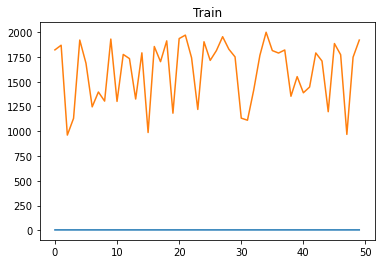

2/2 [==============================] - 3s 89ms/step


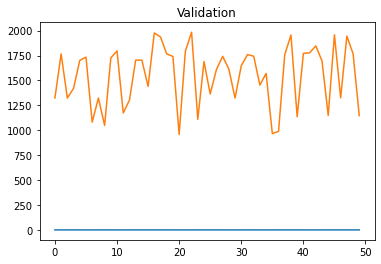

3/3 [==============================] - 0s 134ms/step


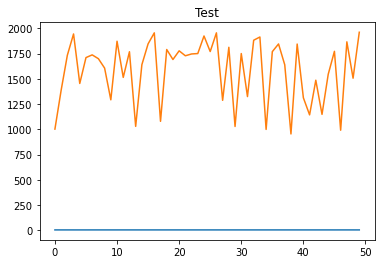

3/3 [==============================] - 0s 6ms/step


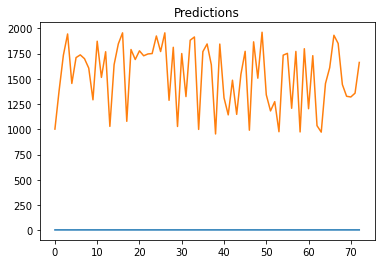

In [19]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2494347.0000 - root_mean_squared_error: 1579.3502 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 19s 2s/step - loss: 2527375.0000 - root_mean_squared_error: 1589.7720 - val_loss: 2502495.0000 - val_root_mean_squared_error: 1581.9276
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2508846.5000 - root_mean_squared_error: 1583.9338INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2526478.0000 - root_mean_squared_error: 1589.4899 - val_loss: 2501619.5000 - val_root_mean_squared_error: 1581.6509
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2505144.5000 - root_mean_squared_error: 1582.7648INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 862ms/step - loss: 2525608.2500 - root_mean_squared_error: 1589.2162 - val_loss: 2500769.7500 - val_root_mean_squared_error: 1581.3822
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2537207.5000 - root_mean_squared_error: 1592.8615INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2524766.5000 - root_mean_squared_error: 1588.9514 - val_loss: 2499944.2500 - val_root_mean_squared_error: 1581.1212
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2510818.2500 - root_mean_squared_error: 1584.5562INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2523947.5000 - root_mean_squared_error: 1588.6936 - val_loss: 2499146.2500 - val_root_mean_squared_error: 1580.8688
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2523149.7500 - root_mean_squared_error: 1588.4425INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2523149.7500 - root_mean_squared_error: 1588.4425 - val_loss: 2498358.5000 - val_root_mean_squared_error: 1580.6196
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2517017.7500 - root_mean_squared_error: 1586.5112INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2522361.7500 - root_mean_squared_error: 1588.1945 - val_loss: 2497583.0000 - val_root_mean_squared_error: 1580.3743
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2528665.5000 - root_mean_squared_error: 1590.1779INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2521587.2500 - root_mean_squared_error: 1587.9507 - val_loss: 2496815.5000 - val_root_mean_squared_error: 1580.1315
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2520823.2500 - root_mean_squared_error: 1587.7101INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2520823.2500 - root_mean_squared_error: 1587.7101 - val_loss: 2496058.7500 - val_root_mean_squared_error: 1579.8920
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2488102.2500 - root_mean_squared_error: 1577.3719INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2520066.2500 - root_mean_squared_error: 1587.4717 - val_loss: 2495308.7500 - val_root_mean_squared_error: 1579.6547
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2519727.2500 - root_mean_squared_error: 1587.3649INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2519311.2500 - root_mean_squared_error: 1587.2339 - val_loss: 2494551.2500 - val_root_mean_squared_error: 1579.4148
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2518551.5000 - root_mean_squared_error: 1586.9945INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2518551.5000 - root_mean_squared_error: 1586.9945 - val_loss: 2493795.5000 - val_root_mean_squared_error: 1579.1755
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2335140.2500 - root_mean_squared_error: 1528.1166INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2517792.5000 - root_mean_squared_error: 1586.7554 - val_loss: 2493036.2500 - val_root_mean_squared_error: 1578.9352
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2517025.7500 - root_mean_squared_error: 1586.5137INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2517025.7500 - root_mean_squared_error: 1586.5137 - val_loss: 2492275.7500 - val_root_mean_squared_error: 1578.6943
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2516267.2500 - root_mean_squared_error: 1586.2747INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2516267.2500 - root_mean_squared_error: 1586.2747 - val_loss: 2491510.2500 - val_root_mean_squared_error: 1578.4519
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2590071.0000 - root_mean_squared_error: 1609.3698INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 923ms/step - loss: 2515497.7500 - root_mean_squared_error: 1586.0321 - val_loss: 2490740.7500 - val_root_mean_squared_error: 1578.2081
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2474855.0000 - root_mean_squared_error: 1573.1672INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2514715.5000 - root_mean_squared_error: 1585.7854 - val_loss: 2489970.5000 - val_root_mean_squared_error: 1577.9640
Epoch 18/50
4/8 [==============>...............] - ETA: 0s - loss: 2563627.0000 - root_mean_squared_error: 1601.1331INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2513941.2500 - root_mean_squared_error: 1585.5413 - val_loss: 2489191.7500 - val_root_mean_squared_error: 1577.7173
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2517546.5000 - root_mean_squared_error: 1586.6779INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2513157.0000 - root_mean_squared_error: 1585.2939 - val_loss: 2488421.0000 - val_root_mean_squared_error: 1577.4730
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2515508.0000 - root_mean_squared_error: 1586.0353INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 949ms/step - loss: 2512385.5000 - root_mean_squared_error: 1585.0507 - val_loss: 2487660.5000 - val_root_mean_squared_error: 1577.2319
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2312390.5000 - root_mean_squared_error: 1520.6547INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2511626.0000 - root_mean_squared_error: 1584.8110 - val_loss: 2486919.7500 - val_root_mean_squared_error: 1576.9971
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2623131.0000 - root_mean_squared_error: 1619.6083INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2510891.0000 - root_mean_squared_error: 1584.5791 - val_loss: 2486203.7500 - val_root_mean_squared_error: 1576.7700
Epoch 23/50
4/8 [==============>...............] - ETA: 0s - loss: 2524167.5000 - root_mean_squared_error: 1588.7629INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2510185.7500 - root_mean_squared_error: 1584.3566 - val_loss: 2485525.7500 - val_root_mean_squared_error: 1576.5551
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2507795.2500 - root_mean_squared_error: 1583.6019INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2509523.2500 - root_mean_squared_error: 1584.1475 - val_loss: 2484887.0000 - val_root_mean_squared_error: 1576.3524
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2490733.7500 - root_mean_squared_error: 1578.2058INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2508902.0000 - root_mean_squared_error: 1583.9514 - val_loss: 2484289.0000 - val_root_mean_squared_error: 1576.1627
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2508325.0000 - root_mean_squared_error: 1583.7693INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2508325.0000 - root_mean_squared_error: 1583.7693 - val_loss: 2483731.2500 - val_root_mean_squared_error: 1575.9858
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2503766.7500 - root_mean_squared_error: 1582.3296INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2507783.0000 - root_mean_squared_error: 1583.5981 - val_loss: 2483207.0000 - val_root_mean_squared_error: 1575.8195
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2498753.7500 - root_mean_squared_error: 1580.7446INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2507275.5000 - root_mean_squared_error: 1583.4379 - val_loss: 2482712.0000 - val_root_mean_squared_error: 1575.6624
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2535585.7500 - root_mean_squared_error: 1592.3523INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2506797.5000 - root_mean_squared_error: 1583.2870 - val_loss: 2482240.0000 - val_root_mean_squared_error: 1575.5126
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2506340.0000 - root_mean_squared_error: 1583.1425INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2506340.0000 - root_mean_squared_error: 1583.1425 - val_loss: 2481791.7500 - val_root_mean_squared_error: 1575.3704
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2517705.0000 - root_mean_squared_error: 1586.7278INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2505908.7500 - root_mean_squared_error: 1583.0062 - val_loss: 2481371.2500 - val_root_mean_squared_error: 1575.2368
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2504380.7500 - root_mean_squared_error: 1582.5236INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2505502.7500 - root_mean_squared_error: 1582.8781 - val_loss: 2480970.2500 - val_root_mean_squared_error: 1575.1096
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2508842.2500 - root_mean_squared_error: 1583.9325INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2505111.5000 - root_mean_squared_error: 1582.7544 - val_loss: 2480584.7500 - val_root_mean_squared_error: 1574.9872
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2513878.0000 - root_mean_squared_error: 1585.5214INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2504739.2500 - root_mean_squared_error: 1582.6368 - val_loss: 2480214.0000 - val_root_mean_squared_error: 1574.8695
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2389777.5000 - root_mean_squared_error: 1545.8905INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2504378.7500 - root_mean_squared_error: 1582.5229 - val_loss: 2479856.5000 - val_root_mean_squared_error: 1574.7560
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2504030.2500 - root_mean_squared_error: 1582.4128INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2504030.2500 - root_mean_squared_error: 1582.4128 - val_loss: 2479509.0000 - val_root_mean_squared_error: 1574.6456
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2518300.5000 - root_mean_squared_error: 1586.9154INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 956ms/step - loss: 2503690.2500 - root_mean_squared_error: 1582.3054 - val_loss: 2479173.0000 - val_root_mean_squared_error: 1574.5389
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2512142.2500 - root_mean_squared_error: 1584.9739INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2503364.0000 - root_mean_squared_error: 1582.2023 - val_loss: 2478846.0000 - val_root_mean_squared_error: 1574.4352
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2494200.2500 - root_mean_squared_error: 1579.3037INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2503044.7500 - root_mean_squared_error: 1582.1013 - val_loss: 2478530.0000 - val_root_mean_squared_error: 1574.3348
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2511699.7500 - root_mean_squared_error: 1584.8344INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2502734.5000 - root_mean_squared_error: 1582.0033 - val_loss: 2478220.7500 - val_root_mean_squared_error: 1574.2366
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2517987.2500 - root_mean_squared_error: 1586.8167INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 2502432.5000 - root_mean_squared_error: 1581.9078 - val_loss: 2477922.0000 - val_root_mean_squared_error: 1574.1417
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 2437653.0000 - root_mean_squared_error: 1561.2985INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2502139.5000 - root_mean_squared_error: 1581.8153 - val_loss: 2477628.7500 - val_root_mean_squared_error: 1574.0485
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2509029.5000 - root_mean_squared_error: 1583.9916INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2501851.7500 - root_mean_squared_error: 1581.7242 - val_loss: 2477340.5000 - val_root_mean_squared_error: 1573.9569
Epoch 44/50
4/8 [==============>...............] - ETA: 0s - loss: 2508221.5000 - root_mean_squared_error: 1583.7366INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2501568.5000 - root_mean_squared_error: 1581.6348 - val_loss: 2477057.7500 - val_root_mean_squared_error: 1573.8672
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2494021.7500 - root_mean_squared_error: 1579.2472INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2501288.7500 - root_mean_squared_error: 1581.5463 - val_loss: 2476777.5000 - val_root_mean_squared_error: 1573.7781
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2531229.5000 - root_mean_squared_error: 1590.9838INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2501013.2500 - root_mean_squared_error: 1581.4592 - val_loss: 2476499.7500 - val_root_mean_squared_error: 1573.6898
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2500739.0000 - root_mean_squared_error: 1581.3726INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500739.0000 - root_mean_squared_error: 1581.3726 - val_loss: 2476227.0000 - val_root_mean_squared_error: 1573.6031
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2583619.0000 - root_mean_squared_error: 1607.3640INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2500471.5000 - root_mean_squared_error: 1581.2880 - val_loss: 2475955.0000 - val_root_mean_squared_error: 1573.5167
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2492016.0000 - root_mean_squared_error: 1578.6121INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2500201.7500 - root_mean_squared_error: 1581.2026 - val_loss: 2475685.7500 - val_root_mean_squared_error: 1573.4312
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2459295.5000 - root_mean_squared_error: 1568.2141INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 9ms/step


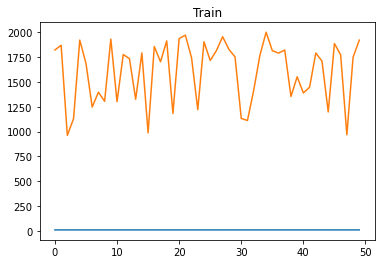

2/2 [==============================] - 2s 6ms/step


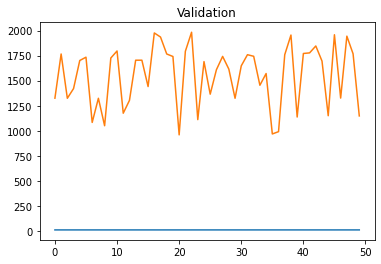

3/3 [==============================] - 0s 6ms/step


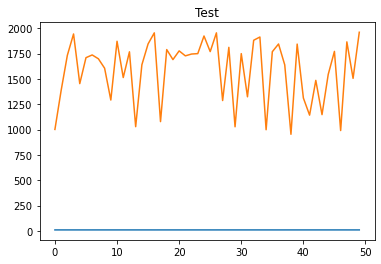

3/3 [==============================] - 0s 5ms/step


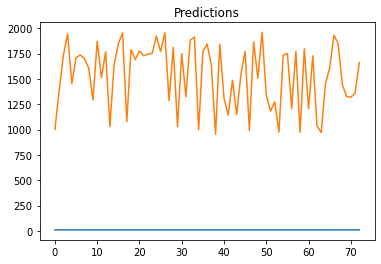

In [20]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2544487.0000 - root_mean_squared_error: 1595.1448 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 14s 1s/step - loss: 2516747.2500 - root_mean_squared_error: 1586.4259 - val_loss: 2481647.5000 - val_root_mean_squared_error: 1575.3245
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2495774.5000 - root_mean_squared_error: 1579.8020

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2504513.7500 - root_mean_squared_error: 1582.5656 - val_loss: 2470583.7500 - val_root_mean_squared_error: 1571.8091
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2482373.2500 - root_mean_squared_error: 1575.5549

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 624ms/step - loss: 2490931.5000 - root_mean_squared_error: 1578.2686 - val_loss: 2458552.2500 - val_root_mean_squared_error: 1567.9772
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2503583.2500 - root_mean_squared_error: 1582.2716

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 2478761.0000 - root_mean_squared_error: 1574.4082 - val_loss: 2445843.7500 - val_root_mean_squared_error: 1563.9193
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2473924.7500 - root_mean_squared_error: 1572.8715

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 2467291.5000 - root_mean_squared_error: 1570.7615 - val_loss: 2432575.5000 - val_root_mean_squared_error: 1559.6716
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2442739.2500 - root_mean_squared_error: 1562.9265

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 953ms/step - loss: 2452698.5000 - root_mean_squared_error: 1566.1094 - val_loss: 2418689.7500 - val_root_mean_squared_error: 1555.2137
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2437576.0000 - root_mean_squared_error: 1561.2738

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2437576.0000 - root_mean_squared_error: 1561.2738 - val_loss: 2404013.2500 - val_root_mean_squared_error: 1550.4880
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2438280.0000 - root_mean_squared_error: 1561.4993

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 2423771.7500 - root_mean_squared_error: 1556.8467 - val_loss: 2388574.0000 - val_root_mean_squared_error: 1545.5012
Epoch 9/50
3/8 [==========>...................] - ETA: 1s - loss: 2427621.0000 - root_mean_squared_error: 1558.0825

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 909ms/step - loss: 2408376.5000 - root_mean_squared_error: 1551.8945 - val_loss: 2372094.2500 - val_root_mean_squared_error: 1540.1605
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 2348834.2500 - root_mean_squared_error: 1532.5907

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 825ms/step - loss: 2392214.0000 - root_mean_squared_error: 1546.6783 - val_loss: 2354560.0000 - val_root_mean_squared_error: 1534.4575
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2436184.5000 - root_mean_squared_error: 1560.8281

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 801ms/step - loss: 2374241.5000 - root_mean_squared_error: 1540.8574 - val_loss: 2335359.0000 - val_root_mean_squared_error: 1528.1881
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 2366161.5000 - root_mean_squared_error: 1538.2333

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 736ms/step - loss: 2355654.2500 - root_mean_squared_error: 1534.8141 - val_loss: 2315009.7500 - val_root_mean_squared_error: 1521.5156
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2328875.7500 - root_mean_squared_error: 1526.0654

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2335208.7500 - root_mean_squared_error: 1528.1390 - val_loss: 2293025.0000 - val_root_mean_squared_error: 1514.2738
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2310566.0000 - root_mean_squared_error: 1520.0546

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 934ms/step - loss: 2310566.0000 - root_mean_squared_error: 1520.0546 - val_loss: 2269496.5000 - val_root_mean_squared_error: 1506.4849
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2288924.0000 - root_mean_squared_error: 1512.9191

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2288924.0000 - root_mean_squared_error: 1512.9191 - val_loss: 2244423.0000 - val_root_mean_squared_error: 1498.1399
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2268839.0000 - root_mean_squared_error: 1506.2666

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2264648.2500 - root_mean_squared_error: 1504.8749 - val_loss: 2217478.2500 - val_root_mean_squared_error: 1489.1200
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2243829.0000 - root_mean_squared_error: 1497.9415

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2237160.0000 - root_mean_squared_error: 1495.7139 - val_loss: 2188748.7500 - val_root_mean_squared_error: 1479.4420
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2196329.7500 - root_mean_squared_error: 1482.0020

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 716ms/step - loss: 2207185.0000 - root_mean_squared_error: 1485.6598 - val_loss: 2157695.7500 - val_root_mean_squared_error: 1468.9097
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2161630.0000 - root_mean_squared_error: 1470.2483

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 805ms/step - loss: 2177351.7500 - root_mean_squared_error: 1475.5852 - val_loss: 2124751.0000 - val_root_mean_squared_error: 1457.6526
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2069427.3750 - root_mean_squared_error: 1438.5504

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 746ms/step - loss: 2143534.7500 - root_mean_squared_error: 1464.0815 - val_loss: 2089816.5000 - val_root_mean_squared_error: 1445.6198
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2103687.5000 - root_mean_squared_error: 1450.4094

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 2108342.2500 - root_mean_squared_error: 1452.0132 - val_loss: 2052838.6250 - val_root_mean_squared_error: 1432.7731
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2027383.7500 - root_mean_squared_error: 1423.8623

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 872ms/step - loss: 2071924.3750 - root_mean_squared_error: 1439.4181 - val_loss: 2013611.8750 - val_root_mean_squared_error: 1419.0179
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2032052.3750 - root_mean_squared_error: 1425.5007

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2032052.3750 - root_mean_squared_error: 1425.5007 - val_loss: 1972762.5000 - val_root_mean_squared_error: 1404.5507
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 1960553.3750 - root_mean_squared_error: 1400.1976

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 855ms/step - loss: 1991679.7500 - root_mean_squared_error: 1411.2688 - val_loss: 1930052.7500 - val_root_mean_squared_error: 1389.2634
Epoch 25/50
4/8 [==============>...............] - ETA: 0s - loss: 1925529.5000 - root_mean_squared_error: 1387.6345

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 1949159.5000 - root_mean_squared_error: 1396.1230 - val_loss: 1884754.5000 - val_root_mean_squared_error: 1372.8636
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 1880195.5000 - root_mean_squared_error: 1371.2023

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 823ms/step - loss: 1905136.7500 - root_mean_squared_error: 1380.2670 - val_loss: 1837345.3750 - val_root_mean_squared_error: 1355.4872
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 1857057.3750 - root_mean_squared_error: 1362.7389

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 727ms/step - loss: 1857612.3750 - root_mean_squared_error: 1362.9425 - val_loss: 1787463.5000 - val_root_mean_squared_error: 1336.9606
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 1809021.7500 - root_mean_squared_error: 1344.9988

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1807289.7500 - root_mean_squared_error: 1344.3547 - val_loss: 1736000.0000 - val_root_mean_squared_error: 1317.5735
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 1754863.0000 - root_mean_squared_error: 1324.7124

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 993ms/step - loss: 1755525.3750 - root_mean_squared_error: 1324.9624 - val_loss: 1683080.5000 - val_root_mean_squared_error: 1297.3359
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 1712613.6250 - root_mean_squared_error: 1308.6687

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1701060.2500 - root_mean_squared_error: 1304.2469 - val_loss: 1628043.1250 - val_root_mean_squared_error: 1275.9479
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 1632514.0000 - root_mean_squared_error: 1277.6987

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 832ms/step - loss: 1645202.6250 - root_mean_squared_error: 1282.6545 - val_loss: 1570995.0000 - val_root_mean_squared_error: 1253.3934
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 1585668.6250 - root_mean_squared_error: 1259.2334

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 1591213.8750 - root_mean_squared_error: 1261.4332 - val_loss: 1512154.2500 - val_root_mean_squared_error: 1229.6968
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 1515568.0000 - root_mean_squared_error: 1231.0841

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 772ms/step - loss: 1533546.3750 - root_mean_squared_error: 1238.3644 - val_loss: 1452526.3750 - val_root_mean_squared_error: 1205.2080
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 1482900.5000 - root_mean_squared_error: 1217.7440

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1473137.3750 - root_mean_squared_error: 1213.7288 - val_loss: 1391784.5000 - val_root_mean_squared_error: 1179.7391
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 1496738.2500 - root_mean_squared_error: 1223.4126

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 897ms/step - loss: 1415747.8750 - root_mean_squared_error: 1189.8521 - val_loss: 1330041.8750 - val_root_mean_squared_error: 1153.2744
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 1359381.7500 - root_mean_squared_error: 1165.9253

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 1353480.1250 - root_mean_squared_error: 1163.3916 - val_loss: 1268140.2500 - val_root_mean_squared_error: 1126.1173
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 1255221.0000 - root_mean_squared_error: 1120.3665

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1293028.7500 - root_mean_squared_error: 1137.1143 - val_loss: 1205691.8750 - val_root_mean_squared_error: 1098.0400
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 1228072.2500 - root_mean_squared_error: 1108.1842

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1223765.2500 - root_mean_squared_error: 1106.2393 - val_loss: 1141754.1250 - val_root_mean_squared_error: 1068.5291
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 1168431.5000 - root_mean_squared_error: 1080.9401

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 817ms/step - loss: 1168863.1250 - root_mean_squared_error: 1081.1398 - val_loss: 1078039.7500 - val_root_mean_squared_error: 1038.2870
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 1071852.0000 - root_mean_squared_error: 1035.3029

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 713ms/step - loss: 1103841.3750 - root_mean_squared_error: 1050.6385 - val_loss: 1014941.5000 - val_root_mean_squared_error: 1007.4431
Epoch 41/50
4/8 [==============>...............] - ETA: 0s - loss: 1062744.5000 - root_mean_squared_error: 1030.8950

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 841ms/step - loss: 1043366.8125 - root_mean_squared_error: 1021.4533 - val_loss: 952472.4375 - val_root_mean_squared_error: 975.9470
Epoch 42/50
3/8 [==========>...................] - ETA: 0s - loss: 962985.7500 - root_mean_squared_error: 981.3184  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 634ms/step - loss: 973599.0000 - root_mean_squared_error: 986.7112 - val_loss: 890434.5000 - val_root_mean_squared_error: 943.6284
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 927100.5000 - root_mean_squared_error: 962.8606

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 787ms/step - loss: 916583.6875 - root_mean_squared_error: 957.3838 - val_loss: 829088.8125 - val_root_mean_squared_error: 910.5432
Epoch 44/50
4/8 [==============>...............] - ETA: 0s - loss: 896891.9375 - root_mean_squared_error: 947.0438

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 856995.0000 - root_mean_squared_error: 925.7402 - val_loss: 770045.9375 - val_root_mean_squared_error: 877.5226
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 833277.0000 - root_mean_squared_error: 912.8401

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 682ms/step - loss: 799388.3750 - root_mean_squared_error: 894.0852 - val_loss: 712700.4375 - val_root_mean_squared_error: 844.2159
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 764242.8750 - root_mean_squared_error: 874.2098

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 852ms/step - loss: 741064.2500 - root_mean_squared_error: 860.8509 - val_loss: 657377.8750 - val_root_mean_squared_error: 810.7885
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 671040.1250 - root_mean_squared_error: 819.1704

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 859ms/step - loss: 691638.8125 - root_mean_squared_error: 831.6483 - val_loss: 605076.0625 - val_root_mean_squared_error: 777.8663
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 659538.5000 - root_mean_squared_error: 812.1198

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 820ms/step - loss: 638705.5625 - root_mean_squared_error: 799.1906 - val_loss: 554169.2500 - val_root_mean_squared_error: 744.4255
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 580701.3125 - root_mean_squared_error: 762.0376

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 584100.0625 - root_mean_squared_error: 764.2644 - val_loss: 506784.6562 - val_root_mean_squared_error: 711.8881
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 543030.9375 - root_mean_squared_error: 736.9063

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 155ms/step


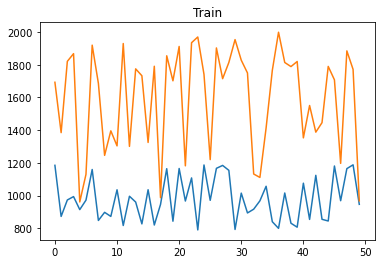

2/2 [==============================] - 0s 5ms/step


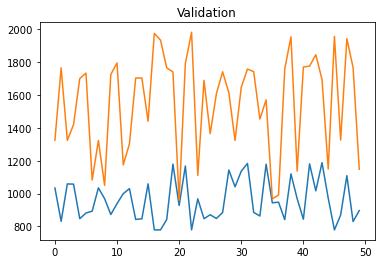

3/3 [==============================] - 2s 660ms/step


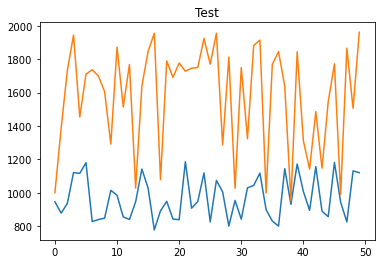

3/3 [==============================] - 0s 8ms/step


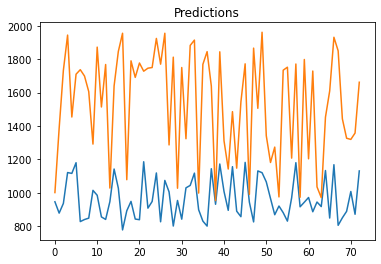

In [21]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_cnn_mse

427665.7916588325

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2532664.7500 - root_mean_squared_error: 1591.4348

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 48s 5s/step - loss: 2532664.7500 - root_mean_squared_error: 1591.4348 - val_loss: 2508893.2500 - val_root_mean_squared_error: 1583.9487
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2531940.5000 - root_mean_squared_error: 1591.2073

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2531940.5000 - root_mean_squared_error: 1591.2073 - val_loss: 2508268.7500 - val_root_mean_squared_error: 1583.7515
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2531183.0000 - root_mean_squared_error: 1590.9692

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2531183.0000 - root_mean_squared_error: 1590.9692 - val_loss: 2507647.0000 - val_root_mean_squared_error: 1583.5552
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2530737.0000 - root_mean_squared_error: 1590.8290

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2530737.0000 - root_mean_squared_error: 1590.8290 - val_loss: 2507024.5000 - val_root_mean_squared_error: 1583.3586
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2528293.2500 - root_mean_squared_error: 1590.0608

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2529909.7500 - root_mean_squared_error: 1590.5690 - val_loss: 2506400.5000 - val_root_mean_squared_error: 1583.1615
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2529474.2500 - root_mean_squared_error: 1590.4321

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2529474.2500 - root_mean_squared_error: 1590.4321 - val_loss: 2505765.2500 - val_root_mean_squared_error: 1582.9609
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2559342.7500 - root_mean_squared_error: 1599.7946

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2528721.5000 - root_mean_squared_error: 1590.1954 - val_loss: 2505119.0000 - val_root_mean_squared_error: 1582.7567
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2519119.2500 - root_mean_squared_error: 1587.1733

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2528197.0000 - root_mean_squared_error: 1590.0305 - val_loss: 2504463.7500 - val_root_mean_squared_error: 1582.5498
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2523688.0000 - root_mean_squared_error: 1588.6119

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2527373.2500 - root_mean_squared_error: 1589.7715 - val_loss: 2503791.5000 - val_root_mean_squared_error: 1582.3373
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2526842.7500 - root_mean_squared_error: 1589.6046

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2526842.7500 - root_mean_squared_error: 1589.6046 - val_loss: 2503096.2500 - val_root_mean_squared_error: 1582.1177
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2535486.2500 - root_mean_squared_error: 1592.3210

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2526126.2500 - root_mean_squared_error: 1589.3792 - val_loss: 2502366.2500 - val_root_mean_squared_error: 1581.8870
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2540459.7500 - root_mean_squared_error: 1593.8820

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2525376.5000 - root_mean_squared_error: 1589.1433 - val_loss: 2501613.2500 - val_root_mean_squared_error: 1581.6489
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2481217.2500 - root_mean_squared_error: 1575.1880

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2524561.0000 - root_mean_squared_error: 1588.8867 - val_loss: 2500836.5000 - val_root_mean_squared_error: 1581.4033
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2526627.0000 - root_mean_squared_error: 1589.5367

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2523683.0000 - root_mean_squared_error: 1588.6104 - val_loss: 2500011.0000 - val_root_mean_squared_error: 1581.1423
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2532205.0000 - root_mean_squared_error: 1591.2904

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2522739.0000 - root_mean_squared_error: 1588.3132 - val_loss: 2499141.5000 - val_root_mean_squared_error: 1580.8673
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2522008.7500 - root_mean_squared_error: 1588.0834

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2522008.7500 - root_mean_squared_error: 1588.0834 - val_loss: 2498222.2500 - val_root_mean_squared_error: 1580.5765
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2480799.0000 - root_mean_squared_error: 1575.0553

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2521129.0000 - root_mean_squared_error: 1587.8064 - val_loss: 2497253.2500 - val_root_mean_squared_error: 1580.2699
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2523408.7500 - root_mean_squared_error: 1588.5240

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2520135.7500 - root_mean_squared_error: 1587.4935 - val_loss: 2496242.0000 - val_root_mean_squared_error: 1579.9501
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2526183.5000 - root_mean_squared_error: 1589.3972

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2519129.7500 - root_mean_squared_error: 1587.1766 - val_loss: 2495192.0000 - val_root_mean_squared_error: 1579.6177
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2513159.7500 - root_mean_squared_error: 1585.2948

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2518080.7500 - root_mean_squared_error: 1586.8462 - val_loss: 2494103.7500 - val_root_mean_squared_error: 1579.2731
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2525941.2500 - root_mean_squared_error: 1589.3210

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2516827.5000 - root_mean_squared_error: 1586.4512 - val_loss: 2492981.5000 - val_root_mean_squared_error: 1578.9178
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2507028.2500 - root_mean_squared_error: 1583.3597

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2515599.7500 - root_mean_squared_error: 1586.0642 - val_loss: 2491845.0000 - val_root_mean_squared_error: 1578.5579
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2514518.2500 - root_mean_squared_error: 1585.7233

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2514518.2500 - root_mean_squared_error: 1585.7233 - val_loss: 2490691.7500 - val_root_mean_squared_error: 1578.1925
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2506250.2500 - root_mean_squared_error: 1583.1141

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2513376.5000 - root_mean_squared_error: 1585.3632 - val_loss: 2489535.5000 - val_root_mean_squared_error: 1577.8262
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2494900.7500 - root_mean_squared_error: 1579.5255

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2512231.2500 - root_mean_squared_error: 1585.0020 - val_loss: 2488395.0000 - val_root_mean_squared_error: 1577.4647
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2468223.7500 - root_mean_squared_error: 1571.0581

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2511139.5000 - root_mean_squared_error: 1584.6576 - val_loss: 2487285.0000 - val_root_mean_squared_error: 1577.1129
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2510326.5000 - root_mean_squared_error: 1584.4011

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2510326.5000 - root_mean_squared_error: 1584.4011 - val_loss: 2486223.0000 - val_root_mean_squared_error: 1576.7761
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2476306.7500 - root_mean_squared_error: 1573.6285

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2508934.2500 - root_mean_squared_error: 1583.9615 - val_loss: 2485206.0000 - val_root_mean_squared_error: 1576.4536
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2580316.5000 - root_mean_squared_error: 1606.3363

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2507896.0000 - root_mean_squared_error: 1583.6338 - val_loss: 2484234.5000 - val_root_mean_squared_error: 1576.1455
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2524083.5000 - root_mean_squared_error: 1588.7365

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2507033.7500 - root_mean_squared_error: 1583.3616 - val_loss: 2483319.7500 - val_root_mean_squared_error: 1575.8552
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2506380.5000 - root_mean_squared_error: 1583.1553

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2506380.5000 - root_mean_squared_error: 1583.1553 - val_loss: 2482461.7500 - val_root_mean_squared_error: 1575.5830
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2505141.0000 - root_mean_squared_error: 1582.7637

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2505141.0000 - root_mean_squared_error: 1582.7637 - val_loss: 2481653.2500 - val_root_mean_squared_error: 1575.3264
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2504581.2500 - root_mean_squared_error: 1582.5869

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2504581.2500 - root_mean_squared_error: 1582.5869 - val_loss: 2480893.0000 - val_root_mean_squared_error: 1575.0851
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2446914.2500 - root_mean_squared_error: 1564.2616

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2503989.7500 - root_mean_squared_error: 1582.4000 - val_loss: 2480177.0000 - val_root_mean_squared_error: 1574.8578
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2503223.5000 - root_mean_squared_error: 1582.1578

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2503223.5000 - root_mean_squared_error: 1582.1578 - val_loss: 2479505.7500 - val_root_mean_squared_error: 1574.6447
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2502476.7500 - root_mean_squared_error: 1581.9219

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2502476.7500 - root_mean_squared_error: 1581.9219 - val_loss: 2478875.2500 - val_root_mean_squared_error: 1574.4445
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2501820.0000 - root_mean_squared_error: 1581.7142

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2501820.0000 - root_mean_squared_error: 1581.7142 - val_loss: 2478277.5000 - val_root_mean_squared_error: 1574.2546
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2525423.5000 - root_mean_squared_error: 1589.1581

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2501436.5000 - root_mean_squared_error: 1581.5930 - val_loss: 2477718.0000 - val_root_mean_squared_error: 1574.0769
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2506173.5000 - root_mean_squared_error: 1583.0898

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2500948.0000 - root_mean_squared_error: 1581.4386 - val_loss: 2477192.5000 - val_root_mean_squared_error: 1573.9099
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2500150.5000 - root_mean_squared_error: 1581.1864

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2500150.5000 - root_mean_squared_error: 1581.1864 - val_loss: 2476687.2500 - val_root_mean_squared_error: 1573.7494
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2493310.7500 - root_mean_squared_error: 1579.0221

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2499532.5000 - root_mean_squared_error: 1580.9910 - val_loss: 2476204.7500 - val_root_mean_squared_error: 1573.5961
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2499195.0000 - root_mean_squared_error: 1580.8843

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2499195.0000 - root_mean_squared_error: 1580.8843 - val_loss: 2475737.5000 - val_root_mean_squared_error: 1573.4476
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2476288.2500 - root_mean_squared_error: 1573.6227

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2498861.7500 - root_mean_squared_error: 1580.7788 - val_loss: 2475292.2500 - val_root_mean_squared_error: 1573.3062
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2498306.2500 - root_mean_squared_error: 1580.6031

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2498306.2500 - root_mean_squared_error: 1580.6031 - val_loss: 2474862.0000 - val_root_mean_squared_error: 1573.1694
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2498011.2500 - root_mean_squared_error: 1580.5098

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2498011.2500 - root_mean_squared_error: 1580.5098 - val_loss: 2474445.7500 - val_root_mean_squared_error: 1573.0371
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2497459.5000 - root_mean_squared_error: 1580.3352

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2497459.5000 - root_mean_squared_error: 1580.3352 - val_loss: 2474037.7500 - val_root_mean_squared_error: 1572.9075
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2536729.7500 - root_mean_squared_error: 1592.7114

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2497185.0000 - root_mean_squared_error: 1580.2484 - val_loss: 2473639.2500 - val_root_mean_squared_error: 1572.7808
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2496541.0000 - root_mean_squared_error: 1580.0447

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2496541.0000 - root_mean_squared_error: 1580.0447 - val_loss: 2473253.5000 - val_root_mean_squared_error: 1572.6581
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2496450.2500 - root_mean_squared_error: 1580.0159

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2496450.2500 - root_mean_squared_error: 1580.0159 - val_loss: 2472880.7500 - val_root_mean_squared_error: 1572.5396
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2496182.7500 - root_mean_squared_error: 1579.9313

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 4s 7ms/step


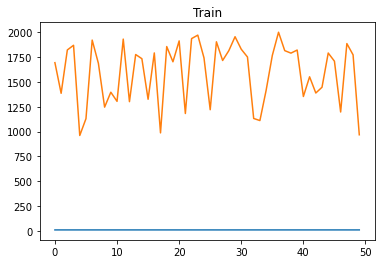

2/2 [==============================] - 3s 11ms/step


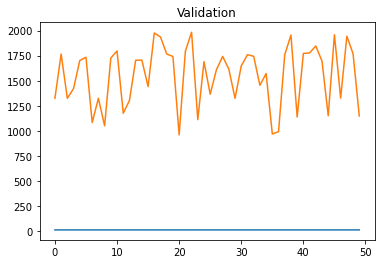

3/3 [==============================] - 0s 5ms/step


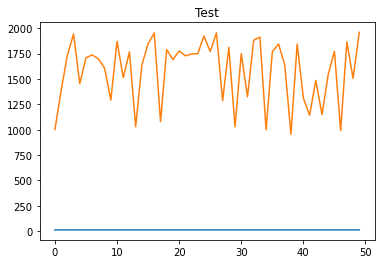

3/3 [==============================] - 0s 71ms/step


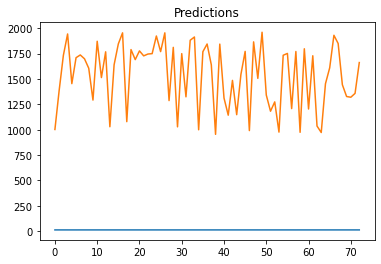

In [23]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_gru_mse

2421095.662074272

### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2527949.5000 - root_mean_squared_error: 1589.9526

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 59s 6s/step - loss: 2527949.5000 - root_mean_squared_error: 1589.9526 - val_loss: 2504425.7500 - val_root_mean_squared_error: 1582.5377
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2527508.5000 - root_mean_squared_error: 1589.8140

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2527498.7500 - root_mean_squared_error: 1589.8109 - val_loss: 2504098.0000 - val_root_mean_squared_error: 1582.4342
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2512027.5000 - root_mean_squared_error: 1584.9377

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2527327.5000 - root_mean_squared_error: 1589.7571 - val_loss: 2503756.7500 - val_root_mean_squared_error: 1582.3264
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2526834.7500 - root_mean_squared_error: 1589.6021

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2526834.7500 - root_mean_squared_error: 1589.6021 - val_loss: 2503401.5000 - val_root_mean_squared_error: 1582.2142
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2526530.2500 - root_mean_squared_error: 1589.5063

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2526530.2500 - root_mean_squared_error: 1589.5063 - val_loss: 2503032.0000 - val_root_mean_squared_error: 1582.0973
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2556239.5000 - root_mean_squared_error: 1598.8245

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2526121.7500 - root_mean_squared_error: 1589.3778 - val_loss: 2502643.7500 - val_root_mean_squared_error: 1581.9746
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2525867.5000 - root_mean_squared_error: 1589.2979

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2525867.5000 - root_mean_squared_error: 1589.2979 - val_loss: 2502243.0000 - val_root_mean_squared_error: 1581.8480
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2525303.7500 - root_mean_squared_error: 1589.1205

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2525303.7500 - root_mean_squared_error: 1589.1205 - val_loss: 2501820.2500 - val_root_mean_squared_error: 1581.7144
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2524878.7500 - root_mean_squared_error: 1588.9867

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2524878.7500 - root_mean_squared_error: 1588.9867 - val_loss: 2501369.0000 - val_root_mean_squared_error: 1581.5717
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2551106.2500 - root_mean_squared_error: 1597.2183

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2524457.7500 - root_mean_squared_error: 1588.8542 - val_loss: 2500885.7500 - val_root_mean_squared_error: 1581.4189
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2524700.7500 - root_mean_squared_error: 1588.9307

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2523906.7500 - root_mean_squared_error: 1588.6808 - val_loss: 2500381.2500 - val_root_mean_squared_error: 1581.2594
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2512762.0000 - root_mean_squared_error: 1585.1694

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2523360.7500 - root_mean_squared_error: 1588.5089 - val_loss: 2499840.0000 - val_root_mean_squared_error: 1581.0883
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2522856.2500 - root_mean_squared_error: 1588.3502

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2522856.2500 - root_mean_squared_error: 1588.3502 - val_loss: 2499265.7500 - val_root_mean_squared_error: 1580.9066
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2499732.7500 - root_mean_squared_error: 1581.0543

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2522313.7500 - root_mean_squared_error: 1588.1793 - val_loss: 2498654.5000 - val_root_mean_squared_error: 1580.7133
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2507968.0000 - root_mean_squared_error: 1583.6565

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2521573.7500 - root_mean_squared_error: 1587.9464 - val_loss: 2498003.0000 - val_root_mean_squared_error: 1580.5072
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2495418.0000 - root_mean_squared_error: 1579.6892

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2521011.2500 - root_mean_squared_error: 1587.7693 - val_loss: 2497312.7500 - val_root_mean_squared_error: 1580.2887
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2513255.7500 - root_mean_squared_error: 1585.3251

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2520230.7500 - root_mean_squared_error: 1587.5234 - val_loss: 2496587.7500 - val_root_mean_squared_error: 1580.0594
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2528689.2500 - root_mean_squared_error: 1590.1853

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2519377.5000 - root_mean_squared_error: 1587.2548 - val_loss: 2495841.7500 - val_root_mean_squared_error: 1579.8234
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2574311.7500 - root_mean_squared_error: 1604.4662

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2518661.2500 - root_mean_squared_error: 1587.0291 - val_loss: 2495087.0000 - val_root_mean_squared_error: 1579.5845
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2518008.2500 - root_mean_squared_error: 1586.8234

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2518008.2500 - root_mean_squared_error: 1586.8234 - val_loss: 2494331.0000 - val_root_mean_squared_error: 1579.3452
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2492738.7500 - root_mean_squared_error: 1578.8409

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2517225.5000 - root_mean_squared_error: 1586.5767 - val_loss: 2493572.2500 - val_root_mean_squared_error: 1579.1049
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2516264.7500 - root_mean_squared_error: 1586.2738

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2516264.7500 - root_mean_squared_error: 1586.2738 - val_loss: 2492810.0000 - val_root_mean_squared_error: 1578.8635
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2502252.0000 - root_mean_squared_error: 1581.8508

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2515725.0000 - root_mean_squared_error: 1586.1038 - val_loss: 2492055.7500 - val_root_mean_squared_error: 1578.6246
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2518162.7500 - root_mean_squared_error: 1586.8719

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2514865.2500 - root_mean_squared_error: 1585.8326 - val_loss: 2491302.0000 - val_root_mean_squared_error: 1578.3859
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2511783.7500 - root_mean_squared_error: 1584.8608

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2514166.5000 - root_mean_squared_error: 1585.6123 - val_loss: 2490549.2500 - val_root_mean_squared_error: 1578.1475
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2518443.7500 - root_mean_squared_error: 1586.9606

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2513417.2500 - root_mean_squared_error: 1585.3761 - val_loss: 2489799.7500 - val_root_mean_squared_error: 1577.9099
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2512806.7500 - root_mean_squared_error: 1585.1835

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2512806.7500 - root_mean_squared_error: 1585.1835 - val_loss: 2489052.7500 - val_root_mean_squared_error: 1577.6732
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2511871.0000 - root_mean_squared_error: 1584.8883

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2511871.0000 - root_mean_squared_error: 1584.8883 - val_loss: 2488303.5000 - val_root_mean_squared_error: 1577.4358
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2481196.0000 - root_mean_squared_error: 1575.1813

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2510969.0000 - root_mean_squared_error: 1584.6038 - val_loss: 2487553.5000 - val_root_mean_squared_error: 1577.1979
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2504493.2500 - root_mean_squared_error: 1582.5591

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2510261.0000 - root_mean_squared_error: 1584.3804 - val_loss: 2486803.0000 - val_root_mean_squared_error: 1576.9601
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2509533.2500 - root_mean_squared_error: 1584.1506

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2509533.2500 - root_mean_squared_error: 1584.1506 - val_loss: 2486055.7500 - val_root_mean_squared_error: 1576.7231
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2497812.5000 - root_mean_squared_error: 1580.4469

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2508779.5000 - root_mean_squared_error: 1583.9127 - val_loss: 2485318.2500 - val_root_mean_squared_error: 1576.4893
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2508180.0000 - root_mean_squared_error: 1583.7235

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2508180.0000 - root_mean_squared_error: 1583.7235 - val_loss: 2484584.2500 - val_root_mean_squared_error: 1576.2563
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2507548.0000 - root_mean_squared_error: 1583.5239

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2507548.0000 - root_mean_squared_error: 1583.5239 - val_loss: 2483850.5000 - val_root_mean_squared_error: 1576.0237
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2517089.2500 - root_mean_squared_error: 1586.5337

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2506600.0000 - root_mean_squared_error: 1583.2246 - val_loss: 2483113.0000 - val_root_mean_squared_error: 1575.7897
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2506105.2500 - root_mean_squared_error: 1583.0684

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2506105.2500 - root_mean_squared_error: 1583.0684 - val_loss: 2482375.5000 - val_root_mean_squared_error: 1575.5557
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2505267.2500 - root_mean_squared_error: 1582.8036

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2505267.2500 - root_mean_squared_error: 1582.8036 - val_loss: 2481635.7500 - val_root_mean_squared_error: 1575.3208
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2453654.0000 - root_mean_squared_error: 1566.4144

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2504638.2500 - root_mean_squared_error: 1582.6049 - val_loss: 2480893.7500 - val_root_mean_squared_error: 1575.0853
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2508346.2500 - root_mean_squared_error: 1583.7760

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2503592.5000 - root_mean_squared_error: 1582.2744 - val_loss: 2480153.5000 - val_root_mean_squared_error: 1574.8503
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2503124.5000 - root_mean_squared_error: 1582.1266

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2503124.5000 - root_mean_squared_error: 1582.1266 - val_loss: 2479412.5000 - val_root_mean_squared_error: 1574.6150
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2510270.2500 - root_mean_squared_error: 1584.3832

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2502610.5000 - root_mean_squared_error: 1581.9641 - val_loss: 2478671.2500 - val_root_mean_squared_error: 1574.3795
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2508633.2500 - root_mean_squared_error: 1583.8666

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2501582.2500 - root_mean_squared_error: 1581.6392 - val_loss: 2477921.7500 - val_root_mean_squared_error: 1574.1416
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2490724.0000 - root_mean_squared_error: 1578.2028

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2500867.0000 - root_mean_squared_error: 1581.4130 - val_loss: 2477169.7500 - val_root_mean_squared_error: 1573.9027
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2519062.2500 - root_mean_squared_error: 1587.1554

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2500208.5000 - root_mean_squared_error: 1581.2047 - val_loss: 2476409.5000 - val_root_mean_squared_error: 1573.6611
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2479998.7500 - root_mean_squared_error: 1574.8011

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2499336.5000 - root_mean_squared_error: 1580.9290 - val_loss: 2475648.0000 - val_root_mean_squared_error: 1573.4192
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2491877.2500 - root_mean_squared_error: 1578.5681

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2498282.7500 - root_mean_squared_error: 1580.5957 - val_loss: 2474889.7500 - val_root_mean_squared_error: 1573.1783
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2497181.5000 - root_mean_squared_error: 1580.2473

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2497910.2500 - root_mean_squared_error: 1580.4779 - val_loss: 2474140.7500 - val_root_mean_squared_error: 1572.9402
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2489682.7500 - root_mean_squared_error: 1577.8728

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2496737.2500 - root_mean_squared_error: 1580.1067 - val_loss: 2473399.5000 - val_root_mean_squared_error: 1572.7045
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2478823.7500 - root_mean_squared_error: 1574.4281

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2496009.2500 - root_mean_squared_error: 1579.8763 - val_loss: 2472543.5000 - val_root_mean_squared_error: 1572.4324
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2479746.0000 - root_mean_squared_error: 1574.7209

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 9ms/step


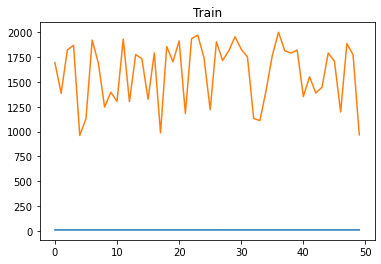

2/2 [==============================] - 4s 7ms/step


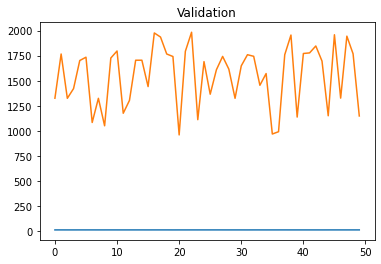

3/3 [==============================] - 0s 41ms/step


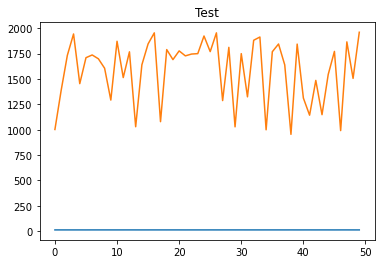

3/3 [==============================] - 0s 5ms/step


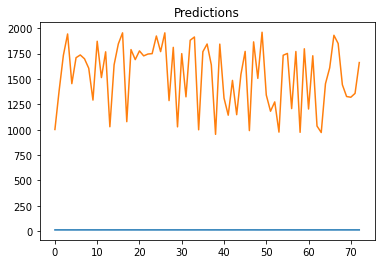

In [25]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_lstm_mse

2420261.458748627

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2536897.7500 - root_mean_squared_error: 1592.7642 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 1s/step - loss: 2530066.7500 - root_mean_squared_error: 1590.6184 - val_loss: 2506295.5000 - val_root_mean_squared_error: 1583.1284
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2531240.7500 - root_mean_squared_error: 1590.9873INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2529006.5000 - root_mean_squared_error: 1590.2850 - val_loss: 2505260.7500 - val_root_mean_squared_error: 1582.8015
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2533686.7500 - root_mean_squared_error: 1591.7559INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2528293.5000 - root_mean_squared_error: 1590.0608 - val_loss: 2504246.5000 - val_root_mean_squared_error: 1582.4811
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2447499.2500 - root_mean_squared_error: 1564.4485INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2526847.5000 - root_mean_squared_error: 1589.6061 - val_loss: 2503240.7500 - val_root_mean_squared_error: 1582.1633
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2531298.2500 - root_mean_squared_error: 1591.0054INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2525948.0000 - root_mean_squared_error: 1589.3231 - val_loss: 2502239.0000 - val_root_mean_squared_error: 1581.8467
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2524875.0000 - root_mean_squared_error: 1588.9855INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2524875.0000 - root_mean_squared_error: 1588.9855 - val_loss: 2501240.2500 - val_root_mean_squared_error: 1581.5310
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2523735.0000 - root_mean_squared_error: 1588.6267INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2523735.0000 - root_mean_squared_error: 1588.6267 - val_loss: 2500244.7500 - val_root_mean_squared_error: 1581.2162
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2526381.7500 - root_mean_squared_error: 1589.4596INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2522983.5000 - root_mean_squared_error: 1588.3903 - val_loss: 2499248.0000 - val_root_mean_squared_error: 1580.9010
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2473911.0000 - root_mean_squared_error: 1572.8672INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 980ms/step - loss: 2522227.5000 - root_mean_squared_error: 1588.1522 - val_loss: 2498260.5000 - val_root_mean_squared_error: 1580.5886
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2574543.0000 - root_mean_squared_error: 1604.5382INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2520932.0000 - root_mean_squared_error: 1587.7443 - val_loss: 2497277.2500 - val_root_mean_squared_error: 1580.2776
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2527100.5000 - root_mean_squared_error: 1589.6857INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2519960.5000 - root_mean_squared_error: 1587.4384 - val_loss: 2496307.0000 - val_root_mean_squared_error: 1579.9706
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2540632.7500 - root_mean_squared_error: 1593.9363INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2519086.5000 - root_mean_squared_error: 1587.1631 - val_loss: 2495352.0000 - val_root_mean_squared_error: 1579.6683
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2531743.2500 - root_mean_squared_error: 1591.1453INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2517811.5000 - root_mean_squared_error: 1586.7614 - val_loss: 2494407.2500 - val_root_mean_squared_error: 1579.3693
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2496442.7500 - root_mean_squared_error: 1580.0135INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2517091.2500 - root_mean_squared_error: 1586.5343 - val_loss: 2493480.5000 - val_root_mean_squared_error: 1579.0758
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2523332.0000 - root_mean_squared_error: 1588.4999INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2516340.7500 - root_mean_squared_error: 1586.2979 - val_loss: 2492560.5000 - val_root_mean_squared_error: 1578.7845
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2464705.5000 - root_mean_squared_error: 1569.9381INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2515207.2500 - root_mean_squared_error: 1585.9406 - val_loss: 2491654.5000 - val_root_mean_squared_error: 1578.4976
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2514600.7500 - root_mean_squared_error: 1585.7493INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2514600.7500 - root_mean_squared_error: 1585.7493 - val_loss: 2490757.5000 - val_root_mean_squared_error: 1578.2134
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2490617.2500 - root_mean_squared_error: 1578.1689INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2513701.5000 - root_mean_squared_error: 1585.4657 - val_loss: 2489881.5000 - val_root_mean_squared_error: 1577.9358
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2507968.5000 - root_mean_squared_error: 1583.6567INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2512704.5000 - root_mean_squared_error: 1585.1512 - val_loss: 2489019.0000 - val_root_mean_squared_error: 1577.6625
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2511732.0000 - root_mean_squared_error: 1584.8445INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2511732.0000 - root_mean_squared_error: 1584.8445 - val_loss: 2488174.0000 - val_root_mean_squared_error: 1577.3947
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2510977.7500 - root_mean_squared_error: 1584.6064INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 927ms/step - loss: 2510977.7500 - root_mean_squared_error: 1584.6064 - val_loss: 2487354.7500 - val_root_mean_squared_error: 1577.1350
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2522414.5000 - root_mean_squared_error: 1588.2111INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2510277.7500 - root_mean_squared_error: 1584.3856 - val_loss: 2486556.2500 - val_root_mean_squared_error: 1576.8818
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2478123.7500 - root_mean_squared_error: 1574.2058INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2509270.7500 - root_mean_squared_error: 1584.0677 - val_loss: 2485784.5000 - val_root_mean_squared_error: 1576.6371
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2508395.7500 - root_mean_squared_error: 1583.7916INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 986ms/step - loss: 2508395.7500 - root_mean_squared_error: 1583.7916 - val_loss: 2485019.5000 - val_root_mean_squared_error: 1576.3944
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2515490.2500 - root_mean_squared_error: 1586.0297INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2507890.7500 - root_mean_squared_error: 1583.6321 - val_loss: 2484287.5000 - val_root_mean_squared_error: 1576.1622
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2507248.5000 - root_mean_squared_error: 1583.4293INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 2507248.5000 - root_mean_squared_error: 1583.4293 - val_loss: 2483587.2500 - val_root_mean_squared_error: 1575.9401
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2516058.2500 - root_mean_squared_error: 1586.2087INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2506066.0000 - root_mean_squared_error: 1583.0559 - val_loss: 2482913.7500 - val_root_mean_squared_error: 1575.7264
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2437177.2500 - root_mean_squared_error: 1561.1461INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2505809.0000 - root_mean_squared_error: 1582.9747 - val_loss: 2482267.2500 - val_root_mean_squared_error: 1575.5212
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2525429.7500 - root_mean_squared_error: 1589.1600INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2505177.2500 - root_mean_squared_error: 1582.7751 - val_loss: 2481647.2500 - val_root_mean_squared_error: 1575.3245
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2504448.7500 - root_mean_squared_error: 1582.5450INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2504448.7500 - root_mean_squared_error: 1582.5450 - val_loss: 2481059.2500 - val_root_mean_squared_error: 1575.1378
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2499784.7500 - root_mean_squared_error: 1581.0708INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2503770.7500 - root_mean_squared_error: 1582.3308 - val_loss: 2480500.7500 - val_root_mean_squared_error: 1574.9606
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2517964.5000 - root_mean_squared_error: 1586.8096INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 2503457.7500 - root_mean_squared_error: 1582.2319 - val_loss: 2479971.0000 - val_root_mean_squared_error: 1574.7924
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2460116.5000 - root_mean_squared_error: 1568.4758INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2503263.2500 - root_mean_squared_error: 1582.1704 - val_loss: 2479471.0000 - val_root_mean_squared_error: 1574.6337
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2492424.0000 - root_mean_squared_error: 1578.7412INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2502461.5000 - root_mean_squared_error: 1581.9170 - val_loss: 2478998.5000 - val_root_mean_squared_error: 1574.4835
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 2434599.0000 - root_mean_squared_error: 1560.3202INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2501933.7500 - root_mean_squared_error: 1581.7502 - val_loss: 2478553.7500 - val_root_mean_squared_error: 1574.3423
Epoch 36/50
4/8 [==============>...............] - ETA: 0s - loss: 2481111.2500 - root_mean_squared_error: 1575.1543INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2501418.5000 - root_mean_squared_error: 1581.5873 - val_loss: 2478131.5000 - val_root_mean_squared_error: 1574.2083
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2522475.2500 - root_mean_squared_error: 1588.2302INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2500756.0000 - root_mean_squared_error: 1581.3779 - val_loss: 2477728.5000 - val_root_mean_squared_error: 1574.0802
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2548904.0000 - root_mean_squared_error: 1596.5287INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2500889.7500 - root_mean_squared_error: 1581.4202 - val_loss: 2477343.0000 - val_root_mean_squared_error: 1573.9578
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2506595.7500 - root_mean_squared_error: 1583.2233INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2500674.0000 - root_mean_squared_error: 1581.3519 - val_loss: 2476973.2500 - val_root_mean_squared_error: 1573.8403
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2477905.7500 - root_mean_squared_error: 1574.1365INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2500052.0000 - root_mean_squared_error: 1581.1553 - val_loss: 2476621.2500 - val_root_mean_squared_error: 1573.7285
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2496524.0000 - root_mean_squared_error: 1580.0392INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2499073.7500 - root_mean_squared_error: 1580.8459 - val_loss: 2476275.2500 - val_root_mean_squared_error: 1573.6185
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2506327.5000 - root_mean_squared_error: 1583.1385INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2499650.0000 - root_mean_squared_error: 1581.0282 - val_loss: 2475942.5000 - val_root_mean_squared_error: 1573.5128
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2498844.2500 - root_mean_squared_error: 1580.7733INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 983ms/step - loss: 2498844.2500 - root_mean_squared_error: 1580.7733 - val_loss: 2475622.0000 - val_root_mean_squared_error: 1573.4109
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2448553.5000 - root_mean_squared_error: 1564.7854INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499036.0000 - root_mean_squared_error: 1580.8340 - val_loss: 2475311.5000 - val_root_mean_squared_error: 1573.3123
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2498480.5000 - root_mean_squared_error: 1580.6582INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2498480.5000 - root_mean_squared_error: 1580.6582 - val_loss: 2475005.7500 - val_root_mean_squared_error: 1573.2151
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2495655.7500 - root_mean_squared_error: 1579.7644INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2498771.7500 - root_mean_squared_error: 1580.7504 - val_loss: 2474711.0000 - val_root_mean_squared_error: 1573.1215
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2559547.7500 - root_mean_squared_error: 1599.8586INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2497620.5000 - root_mean_squared_error: 1580.3862 - val_loss: 2474423.2500 - val_root_mean_squared_error: 1573.0299
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2479203.7500 - root_mean_squared_error: 1574.5487INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2497765.2500 - root_mean_squared_error: 1580.4320 - val_loss: 2474141.2500 - val_root_mean_squared_error: 1572.9403
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2417502.5000 - root_mean_squared_error: 1554.8320INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 27s 4s/step - loss: 2497147.7500 - root_mean_squared_error: 1580.2366 - val_loss: 2473862.5000 - val_root_mean_squared_error: 1572.8519
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2496950.5000 - root_mean_squared_error: 1580.1742INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 8ms/step


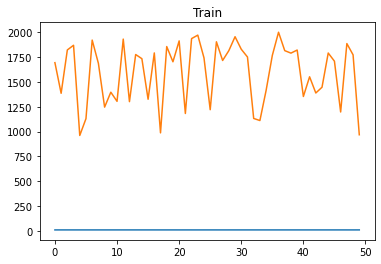

2/2 [==============================] - 1s 6ms/step


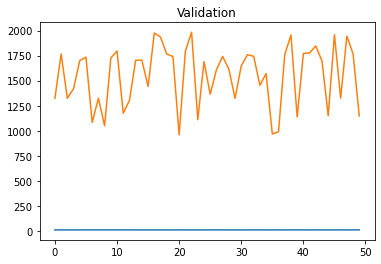

3/3 [==============================] - 0s 9ms/step


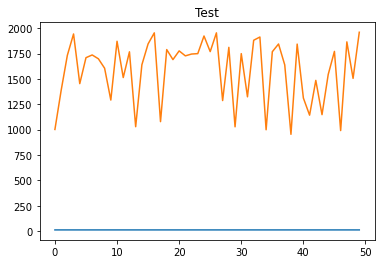

3/3 [==============================] - 0s 8ms/step


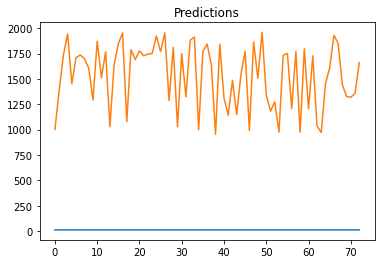

In [27]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
auto_rnn_mse

2422153.9566846634

# Moving Average with Encoder

### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2525490.2500 - root_mean_squared_error: 1589.1791

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 13s 1s/step - loss: 2525490.2500 - root_mean_squared_error: 1589.1791 - val_loss: 2497427.0000 - val_root_mean_squared_error: 1580.3250
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2522008.0000 - root_mean_squared_error: 1588.0831

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2516108.5000 - root_mean_squared_error: 1586.2246 - val_loss: 2486573.7500 - val_root_mean_squared_error: 1576.8873
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2520566.7500 - root_mean_squared_error: 1587.6293

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2504321.5000 - root_mean_squared_error: 1582.5048 - val_loss: 2475005.2500 - val_root_mean_squared_error: 1573.2150
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2494273.0000 - root_mean_squared_error: 1579.3268

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 2494273.0000 - root_mean_squared_error: 1579.3268 - val_loss: 2463374.0000 - val_root_mean_squared_error: 1569.5139
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2471674.2500 - root_mean_squared_error: 1572.1559

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2480518.5000 - root_mean_squared_error: 1574.9662 - val_loss: 2447939.0000 - val_root_mean_squared_error: 1564.5891
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2462987.2500 - root_mean_squared_error: 1569.3907

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2465874.5000 - root_mean_squared_error: 1570.3103 - val_loss: 2430846.0000 - val_root_mean_squared_error: 1559.1171
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2452021.7500 - root_mean_squared_error: 1565.8933

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2452021.7500 - root_mean_squared_error: 1565.8933 - val_loss: 2411660.2500 - val_root_mean_squared_error: 1552.9521
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2428453.5000 - root_mean_squared_error: 1558.3496

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 761ms/step - loss: 2428453.5000 - root_mean_squared_error: 1558.3496 - val_loss: 2390978.0000 - val_root_mean_squared_error: 1546.2788
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2456124.2500 - root_mean_squared_error: 1567.2026

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 2408834.2500 - root_mean_squared_error: 1552.0420 - val_loss: 2369014.5000 - val_root_mean_squared_error: 1539.1603
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2387602.0000 - root_mean_squared_error: 1545.1868

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 738ms/step - loss: 2387602.0000 - root_mean_squared_error: 1545.1868 - val_loss: 2345928.2500 - val_root_mean_squared_error: 1531.6425
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2363736.5000 - root_mean_squared_error: 1537.4448

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2361986.0000 - root_mean_squared_error: 1536.8754 - val_loss: 2321508.5000 - val_root_mean_squared_error: 1523.6498
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2339910.5000 - root_mean_squared_error: 1529.6766

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2339910.5000 - root_mean_squared_error: 1529.6766 - val_loss: 2295504.0000 - val_root_mean_squared_error: 1515.0920
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2313532.2500 - root_mean_squared_error: 1521.0300

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2313532.2500 - root_mean_squared_error: 1521.0300 - val_loss: 2267802.7500 - val_root_mean_squared_error: 1505.9226
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2300986.2500 - root_mean_squared_error: 1516.9003

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 771ms/step - loss: 2288442.7500 - root_mean_squared_error: 1512.7600 - val_loss: 2238276.5000 - val_root_mean_squared_error: 1496.0870
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2238233.2500 - root_mean_squared_error: 1496.0726

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 2254925.2500 - root_mean_squared_error: 1501.6409 - val_loss: 2206589.5000 - val_root_mean_squared_error: 1485.4594
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2222687.7500 - root_mean_squared_error: 1490.8682

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 683ms/step - loss: 2222687.7500 - root_mean_squared_error: 1490.8682 - val_loss: 2172438.5000 - val_root_mean_squared_error: 1473.9194
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2188140.0000 - root_mean_squared_error: 1479.2363

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 2188140.0000 - root_mean_squared_error: 1479.2363 - val_loss: 2135949.7500 - val_root_mean_squared_error: 1461.4889
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2167430.0000 - root_mean_squared_error: 1472.2194

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2152455.7500 - root_mean_squared_error: 1467.1250 - val_loss: 2097163.7500 - val_root_mean_squared_error: 1448.1587
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2113698.5000 - root_mean_squared_error: 1453.8564

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2113698.5000 - root_mean_squared_error: 1453.8564 - val_loss: 2056061.1250 - val_root_mean_squared_error: 1433.8972
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 2062833.0000 - root_mean_squared_error: 1436.2566

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 901ms/step - loss: 2075197.5000 - root_mean_squared_error: 1440.5546 - val_loss: 2012232.1250 - val_root_mean_squared_error: 1418.5317
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2037030.3750 - root_mean_squared_error: 1427.2457

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 733ms/step - loss: 2026831.3750 - root_mean_squared_error: 1423.6683 - val_loss: 1965592.7500 - val_root_mean_squared_error: 1401.9960
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2033159.0000 - root_mean_squared_error: 1425.8888

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1981733.7500 - root_mean_squared_error: 1407.7406 - val_loss: 1916582.3750 - val_root_mean_squared_error: 1384.4069
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 1944042.7500 - root_mean_squared_error: 1394.2893

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 973ms/step - loss: 1932055.7500 - root_mean_squared_error: 1389.9841 - val_loss: 1864847.1250 - val_root_mean_squared_error: 1365.5941
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 1959671.6250 - root_mean_squared_error: 1399.8827

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1881415.2500 - root_mean_squared_error: 1371.6469 - val_loss: 1810461.3750 - val_root_mean_squared_error: 1345.5338
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 1815660.1250 - root_mean_squared_error: 1347.4644

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 1826641.2500 - root_mean_squared_error: 1351.5330 - val_loss: 1754040.0000 - val_root_mean_squared_error: 1324.4017
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 1727643.8750 - root_mean_squared_error: 1314.3987

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 991ms/step - loss: 1760150.3750 - root_mean_squared_error: 1326.7065 - val_loss: 1694688.1250 - val_root_mean_squared_error: 1301.8019
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 1706869.3750 - root_mean_squared_error: 1306.4722

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1706869.3750 - root_mean_squared_error: 1306.4722 - val_loss: 1632500.3750 - val_root_mean_squared_error: 1277.6934
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 1655470.3750 - root_mean_squared_error: 1286.6509

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 17s 2s/step - loss: 1651225.2500 - root_mean_squared_error: 1285.0001 - val_loss: 1568445.7500 - val_root_mean_squared_error: 1252.3761
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 1619530.8750 - root_mean_squared_error: 1272.6079

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 658ms/step - loss: 1582677.6250 - root_mean_squared_error: 1258.0452 - val_loss: 1503015.0000 - val_root_mean_squared_error: 1225.9751
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 1581920.6250 - root_mean_squared_error: 1257.7443

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 1520688.8750 - root_mean_squared_error: 1233.1621 - val_loss: 1436217.3750 - val_root_mean_squared_error: 1198.4229
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 1462070.1250 - root_mean_squared_error: 1209.1609

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 649ms/step - loss: 1447522.1250 - root_mean_squared_error: 1203.1301 - val_loss: 1368630.1250 - val_root_mean_squared_error: 1169.8846
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 1405300.0000 - root_mean_squared_error: 1185.4535

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 1383755.1250 - root_mean_squared_error: 1176.3312 - val_loss: 1300460.5000 - val_root_mean_squared_error: 1140.3773
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 1303995.1250 - root_mean_squared_error: 1141.9260

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 950ms/step - loss: 1309347.8750 - root_mean_squared_error: 1144.2675 - val_loss: 1231241.0000 - val_root_mean_squared_error: 1109.6130
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 1268416.1250 - root_mean_squared_error: 1126.2399

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1244214.6250 - root_mean_squared_error: 1115.4437 - val_loss: 1159829.1250 - val_root_mean_squared_error: 1076.9536
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 1155037.8750 - root_mean_squared_error: 1074.7269 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 536ms/step - loss: 1174480.3750 - root_mean_squared_error: 1083.7345 - val_loss: 1089225.6250 - val_root_mean_squared_error: 1043.6597
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 1085650.0000 - root_mean_squared_error: 1041.9453

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1103721.8750 - root_mean_squared_error: 1050.5817 - val_loss: 1018506.1250 - val_root_mean_squared_error: 1009.2106
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 1031581.5000 - root_mean_squared_error: 1015.6680

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 722ms/step - loss: 1031396.3125 - root_mean_squared_error: 1015.5768 - val_loss: 948102.2500 - val_root_mean_squared_error: 973.7054
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 969250.6875 - root_mean_squared_error: 984.5053

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 755ms/step - loss: 959255.0000 - root_mean_squared_error: 979.4156 - val_loss: 879311.5625 - val_root_mean_squared_error: 937.7161
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 885487.1875 - root_mean_squared_error: 941.0033

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 885487.1875 - root_mean_squared_error: 941.0033 - val_loss: 811426.0625 - val_root_mean_squared_error: 900.7919
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 807253.8125 - root_mean_squared_error: 898.4730

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 808ms/step - loss: 821076.8750 - root_mean_squared_error: 906.1329 - val_loss: 745672.6875 - val_root_mean_squared_error: 863.5234
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 760781.6875 - root_mean_squared_error: 872.2280

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 519ms/step - loss: 760781.6875 - root_mean_squared_error: 872.2280 - val_loss: 682477.8125 - val_root_mean_squared_error: 826.1221
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 696784.3125 - root_mean_squared_error: 834.7361

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 694390.7500 - root_mean_squared_error: 833.3011 - val_loss: 622771.5625 - val_root_mean_squared_error: 789.1588
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 635158.5625 - root_mean_squared_error: 796.9684

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 801ms/step - loss: 635690.6250 - root_mean_squared_error: 797.3021 - val_loss: 565253.1875 - val_root_mean_squared_error: 751.8332
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 590773.7500 - root_mean_squared_error: 768.6181

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 714ms/step - loss: 580374.0625 - root_mean_squared_error: 761.8229 - val_loss: 511505.8750 - val_root_mean_squared_error: 715.1964
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 521143.8125 - root_mean_squared_error: 721.9029

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 522770.5000 - root_mean_squared_error: 723.0287 - val_loss: 460953.6562 - val_root_mean_squared_error: 678.9357
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 482832.5938 - root_mean_squared_error: 694.8616

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 687ms/step - loss: 475485.9375 - root_mean_squared_error: 689.5549 - val_loss: 413957.2500 - val_root_mean_squared_error: 643.3951
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 426246.0000 - root_mean_squared_error: 652.8752

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 424824.5938 - root_mean_squared_error: 651.7857 - val_loss: 370517.7188 - val_root_mean_squared_error: 608.7017
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 378572.5312 - root_mean_squared_error: 615.2825

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 988ms/step - loss: 383966.7500 - root_mean_squared_error: 619.6505 - val_loss: 332107.6562 - val_root_mean_squared_error: 576.2878
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 348852.6875 - root_mean_squared_error: 590.6375

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 925ms/step - loss: 344179.0312 - root_mean_squared_error: 586.6677 - val_loss: 297022.0312 - val_root_mean_squared_error: 544.9973
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 298297.7812 - root_mean_squared_error: 546.1664

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 13ms/step


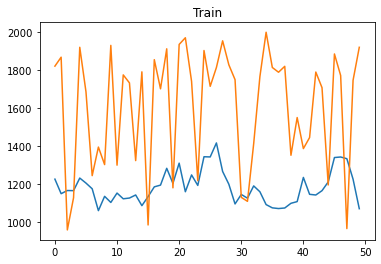

2/2 [==============================] - 0s 5ms/step


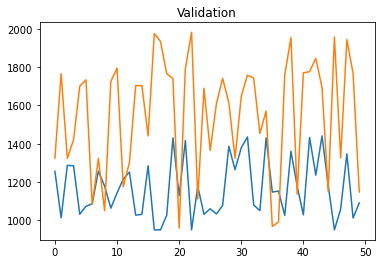

3/3 [==============================] - 0s 3ms/step


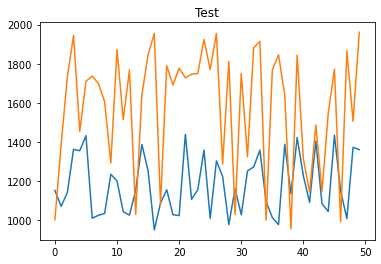

3/3 [==============================] - 0s 6ms/step


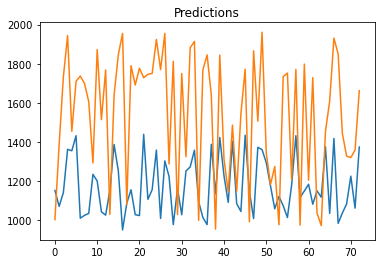

In [29]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_cnn_mse

237751.6483221871

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2501855.2500 - root_mean_squared_error: 1581.7255  INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 21s 2s/step - loss: 2528790.0000 - root_mean_squared_error: 1590.2169 - val_loss: 2503775.5000 - val_root_mean_squared_error: 1582.3323
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2479459.2500 - root_mean_squared_error: 1574.6299INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2527615.2500 - root_mean_squared_error: 1589.8475 - val_loss: 2502697.7500 - val_root_mean_squared_error: 1581.9917
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2484273.5000 - root_mean_squared_error: 1576.1578INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2526475.7500 - root_mean_squared_error: 1589.4891 - val_loss: 2501628.5000 - val_root_mean_squared_error: 1581.6537
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2525603.0000 - root_mean_squared_error: 1589.2146INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2525603.0000 - root_mean_squared_error: 1589.2146 - val_loss: 2500573.5000 - val_root_mean_squared_error: 1581.3202
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2549865.2500 - root_mean_squared_error: 1596.8297INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2524471.5000 - root_mean_squared_error: 1588.8585 - val_loss: 2499532.7500 - val_root_mean_squared_error: 1580.9911
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2523278.2500 - root_mean_squared_error: 1588.4830INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2523278.2500 - root_mean_squared_error: 1588.4830 - val_loss: 2498508.2500 - val_root_mean_squared_error: 1580.6670
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2510944.7500 - root_mean_squared_error: 1584.5961INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 712ms/step - loss: 2522425.0000 - root_mean_squared_error: 1588.2144 - val_loss: 2497501.2500 - val_root_mean_squared_error: 1580.3485
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2560159.5000 - root_mean_squared_error: 1600.0498INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 2521470.2500 - root_mean_squared_error: 1587.9138 - val_loss: 2496487.2500 - val_root_mean_squared_error: 1580.0276
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2505696.5000 - root_mean_squared_error: 1582.9392INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2520193.7500 - root_mean_squared_error: 1587.5118 - val_loss: 2495495.7500 - val_root_mean_squared_error: 1579.7139
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2509280.0000 - root_mean_squared_error: 1584.0707INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2519474.2500 - root_mean_squared_error: 1587.2852 - val_loss: 2494513.0000 - val_root_mean_squared_error: 1579.4027
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2588276.7500 - root_mean_squared_error: 1608.8123INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2518475.0000 - root_mean_squared_error: 1586.9703 - val_loss: 2493544.5000 - val_root_mean_squared_error: 1579.0961
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2563797.7500 - root_mean_squared_error: 1601.1864INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2517509.0000 - root_mean_squared_error: 1586.6660 - val_loss: 2492602.2500 - val_root_mean_squared_error: 1578.7977
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2450745.7500 - root_mean_squared_error: 1565.4858INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2516346.2500 - root_mean_squared_error: 1586.2996 - val_loss: 2491685.2500 - val_root_mean_squared_error: 1578.5073
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2515835.0000 - root_mean_squared_error: 1586.1384INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2515835.0000 - root_mean_squared_error: 1586.1384 - val_loss: 2490785.0000 - val_root_mean_squared_error: 1578.2220
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2514656.2500 - root_mean_squared_error: 1585.7667INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2514656.2500 - root_mean_squared_error: 1585.7667 - val_loss: 2489915.7500 - val_root_mean_squared_error: 1577.9467
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2550054.2500 - root_mean_squared_error: 1596.8889INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2513933.7500 - root_mean_squared_error: 1585.5389 - val_loss: 2489078.0000 - val_root_mean_squared_error: 1577.6812
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2516642.0000 - root_mean_squared_error: 1586.3928INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2513198.0000 - root_mean_squared_error: 1585.3069 - val_loss: 2488271.5000 - val_root_mean_squared_error: 1577.4255
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2551132.7500 - root_mean_squared_error: 1597.2266INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 943ms/step - loss: 2512395.7500 - root_mean_squared_error: 1585.0538 - val_loss: 2487501.0000 - val_root_mean_squared_error: 1577.1814
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2511344.7500 - root_mean_squared_error: 1584.7223INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2511344.7500 - root_mean_squared_error: 1584.7223 - val_loss: 2486768.5000 - val_root_mean_squared_error: 1576.9491
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2528935.7500 - root_mean_squared_error: 1590.2628INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2510796.0000 - root_mean_squared_error: 1584.5492 - val_loss: 2486056.0000 - val_root_mean_squared_error: 1576.7231
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2561949.5000 - root_mean_squared_error: 1600.6091INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2510017.0000 - root_mean_squared_error: 1584.3033 - val_loss: 2485373.2500 - val_root_mean_squared_error: 1576.5067
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2510232.2500 - root_mean_squared_error: 1584.3712INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2508945.0000 - root_mean_squared_error: 1583.9650 - val_loss: 2484724.7500 - val_root_mean_squared_error: 1576.3010
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2508425.5000 - root_mean_squared_error: 1583.8010INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2508425.5000 - root_mean_squared_error: 1583.8010 - val_loss: 2484101.2500 - val_root_mean_squared_error: 1576.1031
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2504652.0000 - root_mean_squared_error: 1582.6093INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2508258.5000 - root_mean_squared_error: 1583.7483 - val_loss: 2483501.0000 - val_root_mean_squared_error: 1575.9127
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2565250.5000 - root_mean_squared_error: 1601.6399INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2507383.2500 - root_mean_squared_error: 1583.4719 - val_loss: 2482929.7500 - val_root_mean_squared_error: 1575.7314
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2525316.2500 - root_mean_squared_error: 1589.1244INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2506654.7500 - root_mean_squared_error: 1583.2418 - val_loss: 2482382.2500 - val_root_mean_squared_error: 1575.5577
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2496997.5000 - root_mean_squared_error: 1580.1891INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2506833.2500 - root_mean_squared_error: 1583.2982 - val_loss: 2481862.5000 - val_root_mean_squared_error: 1575.3928
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2501804.2500 - root_mean_squared_error: 1581.7092INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2506104.0000 - root_mean_squared_error: 1583.0679 - val_loss: 2481365.5000 - val_root_mean_squared_error: 1575.2351
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2507934.7500 - root_mean_squared_error: 1583.6460INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2505401.0000 - root_mean_squared_error: 1582.8458 - val_loss: 2480883.5000 - val_root_mean_squared_error: 1575.0820
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2504971.5000 - root_mean_squared_error: 1582.7102INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2504971.5000 - root_mean_squared_error: 1582.7102 - val_loss: 2480417.7500 - val_root_mean_squared_error: 1574.9342
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2501471.5000 - root_mean_squared_error: 1581.6041INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 807ms/step - loss: 2504442.5000 - root_mean_squared_error: 1582.5431 - val_loss: 2479970.2500 - val_root_mean_squared_error: 1574.7921
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2541239.7500 - root_mean_squared_error: 1594.1266INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2504236.2500 - root_mean_squared_error: 1582.4779 - val_loss: 2479542.0000 - val_root_mean_squared_error: 1574.6561
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2448923.5000 - root_mean_squared_error: 1564.9037INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2503866.5000 - root_mean_squared_error: 1582.3611 - val_loss: 2479129.5000 - val_root_mean_squared_error: 1574.5251
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2482382.5000 - root_mean_squared_error: 1575.5579INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2503107.2500 - root_mean_squared_error: 1582.1211 - val_loss: 2478727.2500 - val_root_mean_squared_error: 1574.3975
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2523039.5000 - root_mean_squared_error: 1588.4078INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2502547.5000 - root_mean_squared_error: 1581.9442 - val_loss: 2478337.0000 - val_root_mean_squared_error: 1574.2734
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2502736.2500 - root_mean_squared_error: 1582.0039INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2502736.2500 - root_mean_squared_error: 1582.0039 - val_loss: 2477965.0000 - val_root_mean_squared_error: 1574.1553
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2507802.0000 - root_mean_squared_error: 1583.6041INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 2502408.5000 - root_mean_squared_error: 1581.9003 - val_loss: 2477605.0000 - val_root_mean_squared_error: 1574.0410
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2412066.2500 - root_mean_squared_error: 1553.0828INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2501800.2500 - root_mean_squared_error: 1581.7080 - val_loss: 2477256.0000 - val_root_mean_squared_error: 1573.9301
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2468486.5000 - root_mean_squared_error: 1571.1417INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2501952.5000 - root_mean_squared_error: 1581.7561 - val_loss: 2476913.5000 - val_root_mean_squared_error: 1573.8213
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2500269.0000 - root_mean_squared_error: 1581.2239INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2500723.2500 - root_mean_squared_error: 1581.3676 - val_loss: 2476581.0000 - val_root_mean_squared_error: 1573.7157
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2501164.2500 - root_mean_squared_error: 1581.5070INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2501164.2500 - root_mean_squared_error: 1581.5070 - val_loss: 2476259.2500 - val_root_mean_squared_error: 1573.6134
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 2571253.5000 - root_mean_squared_error: 1603.5128INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2500111.7500 - root_mean_squared_error: 1581.1742 - val_loss: 2475945.7500 - val_root_mean_squared_error: 1573.5138
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2500117.2500 - root_mean_squared_error: 1581.1759INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2500117.2500 - root_mean_squared_error: 1581.1759 - val_loss: 2475639.2500 - val_root_mean_squared_error: 1573.4164
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2488588.5000 - root_mean_squared_error: 1577.5261INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 23s 3s/step - loss: 2499669.7500 - root_mean_squared_error: 1581.0344 - val_loss: 2475339.0000 - val_root_mean_squared_error: 1573.3210
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2499760.2500 - root_mean_squared_error: 1581.0630INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2499760.2500 - root_mean_squared_error: 1581.0630 - val_loss: 2475044.7500 - val_root_mean_squared_error: 1573.2275
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2514898.5000 - root_mean_squared_error: 1585.8431INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499030.7500 - root_mean_squared_error: 1580.8323 - val_loss: 2474757.5000 - val_root_mean_squared_error: 1573.1362
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2485125.5000 - root_mean_squared_error: 1576.4281INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2499098.2500 - root_mean_squared_error: 1580.8536 - val_loss: 2474482.5000 - val_root_mean_squared_error: 1573.0488
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2482176.5000 - root_mean_squared_error: 1575.4924INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2498450.2500 - root_mean_squared_error: 1580.6487 - val_loss: 2474209.7500 - val_root_mean_squared_error: 1572.9620
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2474112.7500 - root_mean_squared_error: 1572.9313INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2498716.0000 - root_mean_squared_error: 1580.7328 - val_loss: 2473940.5000 - val_root_mean_squared_error: 1572.8765
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2501599.7500 - root_mean_squared_error: 1581.6447INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 9ms/step


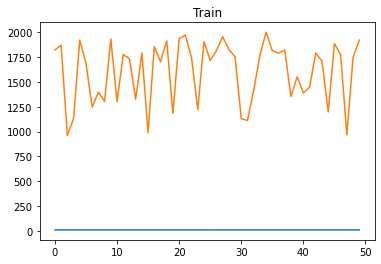

2/2 [==============================] - 1s 6ms/step


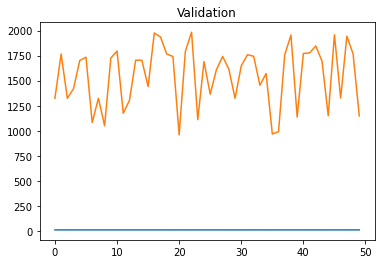

3/3 [==============================] - 0s 5ms/step


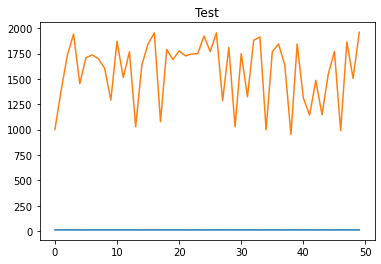

3/3 [==============================] - 0s 4ms/step


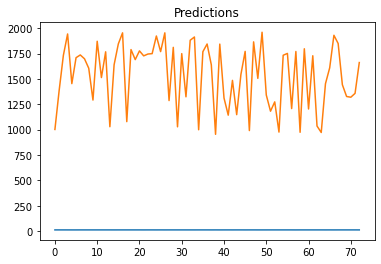

In [31]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_rnn_mse

2422245.786278928

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2532400.0000 - root_mean_squared_error: 1591.3517

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 55s 5s/step - loss: 2532400.0000 - root_mean_squared_error: 1591.3517 - val_loss: 2507682.0000 - val_root_mean_squared_error: 1583.5662
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2521600.2500 - root_mean_squared_error: 1587.9547

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2531898.7500 - root_mean_squared_error: 1591.1941 - val_loss: 2507139.0000 - val_root_mean_squared_error: 1583.3948
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2503597.7500 - root_mean_squared_error: 1582.2761

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2531311.7500 - root_mean_squared_error: 1591.0096 - val_loss: 2506598.0000 - val_root_mean_squared_error: 1583.2239
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2520544.5000 - root_mean_squared_error: 1587.6223

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2530821.7500 - root_mean_squared_error: 1590.8557 - val_loss: 2506054.0000 - val_root_mean_squared_error: 1583.0521
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2529210.7500 - root_mean_squared_error: 1590.3492

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2530230.0000 - root_mean_squared_error: 1590.6697 - val_loss: 2505505.0000 - val_root_mean_squared_error: 1582.8787
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2529624.2500 - root_mean_squared_error: 1590.4792

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2529624.2500 - root_mean_squared_error: 1590.4792 - val_loss: 2504947.5000 - val_root_mean_squared_error: 1582.7026
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2529149.0000 - root_mean_squared_error: 1590.3298

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2529149.0000 - root_mean_squared_error: 1590.3298 - val_loss: 2504376.0000 - val_root_mean_squared_error: 1582.5220
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2528546.5000 - root_mean_squared_error: 1590.1404

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2528546.5000 - root_mean_squared_error: 1590.1404 - val_loss: 2503785.0000 - val_root_mean_squared_error: 1582.3354
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2521316.7500 - root_mean_squared_error: 1587.8655

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2527893.5000 - root_mean_squared_error: 1589.9351 - val_loss: 2503178.2500 - val_root_mean_squared_error: 1582.1436
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2507534.7500 - root_mean_squared_error: 1583.5198

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2527407.5000 - root_mean_squared_error: 1589.7822 - val_loss: 2502539.0000 - val_root_mean_squared_error: 1581.9415
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2526635.0000 - root_mean_squared_error: 1589.5392

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2526635.0000 - root_mean_squared_error: 1589.5392 - val_loss: 2501877.5000 - val_root_mean_squared_error: 1581.7325
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2521242.7500 - root_mean_squared_error: 1587.8422

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2526042.7500 - root_mean_squared_error: 1589.3529 - val_loss: 2501188.7500 - val_root_mean_squared_error: 1581.5146
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2542344.7500 - root_mean_squared_error: 1594.4731

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2525234.2500 - root_mean_squared_error: 1589.0985 - val_loss: 2500476.5000 - val_root_mean_squared_error: 1581.2896
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2515826.7500 - root_mean_squared_error: 1586.1357

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2524531.7500 - root_mean_squared_error: 1588.8776 - val_loss: 2499736.2500 - val_root_mean_squared_error: 1581.0553
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2506301.2500 - root_mean_squared_error: 1583.1302

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 2523712.7500 - root_mean_squared_error: 1588.6198 - val_loss: 2498965.0000 - val_root_mean_squared_error: 1580.8115
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2522989.5000 - root_mean_squared_error: 1588.3921

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2522989.5000 - root_mean_squared_error: 1588.3921 - val_loss: 2498161.7500 - val_root_mean_squared_error: 1580.5574
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2522106.7500 - root_mean_squared_error: 1588.1143

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 2522106.7500 - root_mean_squared_error: 1588.1143 - val_loss: 2497334.5000 - val_root_mean_squared_error: 1580.2957
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2535322.7500 - root_mean_squared_error: 1592.2697

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2521345.0000 - root_mean_squared_error: 1587.8744 - val_loss: 2496478.0000 - val_root_mean_squared_error: 1580.0247
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2513540.2500 - root_mean_squared_error: 1585.4148

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2520453.2500 - root_mean_squared_error: 1587.5935 - val_loss: 2495603.5000 - val_root_mean_squared_error: 1579.7479
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2506233.5000 - root_mean_squared_error: 1583.1088

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2519567.7500 - root_mean_squared_error: 1587.3146 - val_loss: 2494691.7500 - val_root_mean_squared_error: 1579.4594
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2507735.5000 - root_mean_squared_error: 1583.5831

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2518751.7500 - root_mean_squared_error: 1587.0576 - val_loss: 2493749.0000 - val_root_mean_squared_error: 1579.1609
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2517552.7500 - root_mean_squared_error: 1586.6798

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2517552.7500 - root_mean_squared_error: 1586.6798 - val_loss: 2492781.2500 - val_root_mean_squared_error: 1578.8544
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2521963.2500 - root_mean_squared_error: 1588.0691

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2516719.0000 - root_mean_squared_error: 1586.4170 - val_loss: 2491795.5000 - val_root_mean_squared_error: 1578.5422
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2515714.7500 - root_mean_squared_error: 1586.1005

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2515714.7500 - root_mean_squared_error: 1586.1005 - val_loss: 2490810.0000 - val_root_mean_squared_error: 1578.2300
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2514837.0000 - root_mean_squared_error: 1585.8237

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 5s/step - loss: 2514837.0000 - root_mean_squared_error: 1585.8237 - val_loss: 2489831.5000 - val_root_mean_squared_error: 1577.9200
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2514576.7500 - root_mean_squared_error: 1585.7417

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2513533.5000 - root_mean_squared_error: 1585.4127 - val_loss: 2488851.5000 - val_root_mean_squared_error: 1577.6094
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2504456.0000 - root_mean_squared_error: 1582.5474

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2512639.0000 - root_mean_squared_error: 1585.1306 - val_loss: 2487882.5000 - val_root_mean_squared_error: 1577.3022
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2512053.7500 - root_mean_squared_error: 1584.9459

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2512053.7500 - root_mean_squared_error: 1584.9459 - val_loss: 2486938.5000 - val_root_mean_squared_error: 1577.0031
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2510812.2500 - root_mean_squared_error: 1584.5543

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2510812.2500 - root_mean_squared_error: 1584.5543 - val_loss: 2486029.2500 - val_root_mean_squared_error: 1576.7147
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2494093.5000 - root_mean_squared_error: 1579.2699

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2510032.5000 - root_mean_squared_error: 1584.3082 - val_loss: 2485156.5000 - val_root_mean_squared_error: 1576.4379
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2511860.5000 - root_mean_squared_error: 1584.8850

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2509180.2500 - root_mean_squared_error: 1584.0392 - val_loss: 2484315.2500 - val_root_mean_squared_error: 1576.1710
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2512615.5000 - root_mean_squared_error: 1585.1232

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2508177.5000 - root_mean_squared_error: 1583.7227 - val_loss: 2483521.5000 - val_root_mean_squared_error: 1575.9193
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2528979.5000 - root_mean_squared_error: 1590.2765

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2507355.0000 - root_mean_squared_error: 1583.4630 - val_loss: 2482769.7500 - val_root_mean_squared_error: 1575.6808
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2506943.0000 - root_mean_squared_error: 1583.3329

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2506943.0000 - root_mean_squared_error: 1583.3329 - val_loss: 2482068.2500 - val_root_mean_squared_error: 1575.4580
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2516367.7500 - root_mean_squared_error: 1586.3063

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2506192.5000 - root_mean_squared_error: 1583.0958 - val_loss: 2481405.0000 - val_root_mean_squared_error: 1575.2476
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2503296.2500 - root_mean_squared_error: 1582.1809

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2505576.7500 - root_mean_squared_error: 1582.9014 - val_loss: 2480784.5000 - val_root_mean_squared_error: 1575.0507
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2513861.5000 - root_mean_squared_error: 1585.5161

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2504892.7500 - root_mean_squared_error: 1582.6853 - val_loss: 2480198.2500 - val_root_mean_squared_error: 1574.8645
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2498954.0000 - root_mean_squared_error: 1580.8080

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2504359.2500 - root_mean_squared_error: 1582.5167 - val_loss: 2479651.0000 - val_root_mean_squared_error: 1574.6908
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2489339.5000 - root_mean_squared_error: 1577.7640

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2503673.5000 - root_mean_squared_error: 1582.3000 - val_loss: 2479130.7500 - val_root_mean_squared_error: 1574.5255
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2503122.2500 - root_mean_squared_error: 1582.1259

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 2503122.2500 - root_mean_squared_error: 1582.1259 - val_loss: 2478632.0000 - val_root_mean_squared_error: 1574.3672
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2502952.2500 - root_mean_squared_error: 1582.0721

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2502952.2500 - root_mean_squared_error: 1582.0721 - val_loss: 2478159.5000 - val_root_mean_squared_error: 1574.2172
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2507003.5000 - root_mean_squared_error: 1583.3519

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2502222.5000 - root_mean_squared_error: 1581.8414 - val_loss: 2477706.7500 - val_root_mean_squared_error: 1574.0732
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2437343.7500 - root_mean_squared_error: 1561.1995

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2501829.0000 - root_mean_squared_error: 1581.7172 - val_loss: 2477276.5000 - val_root_mean_squared_error: 1573.9366
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2501388.5000 - root_mean_squared_error: 1581.5779

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2501388.5000 - root_mean_squared_error: 1581.5779 - val_loss: 2476864.5000 - val_root_mean_squared_error: 1573.8058
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2514620.5000 - root_mean_squared_error: 1585.7555

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2501345.0000 - root_mean_squared_error: 1581.5641 - val_loss: 2476470.5000 - val_root_mean_squared_error: 1573.6805
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2490645.2500 - root_mean_squared_error: 1578.1779

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2500727.0000 - root_mean_squared_error: 1581.3687 - val_loss: 2476087.7500 - val_root_mean_squared_error: 1573.5590
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2500743.0000 - root_mean_squared_error: 1581.3738

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2500743.0000 - root_mean_squared_error: 1581.3738 - val_loss: 2475718.2500 - val_root_mean_squared_error: 1573.4415
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2499241.5000 - root_mean_squared_error: 1580.8989

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2499692.2500 - root_mean_squared_error: 1581.0415 - val_loss: 2475360.0000 - val_root_mean_squared_error: 1573.3276
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2499892.7500 - root_mean_squared_error: 1581.1049

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2499892.7500 - root_mean_squared_error: 1581.1049 - val_loss: 2475011.2500 - val_root_mean_squared_error: 1573.2168
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2547468.2500 - root_mean_squared_error: 1596.0790

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 14ms/step


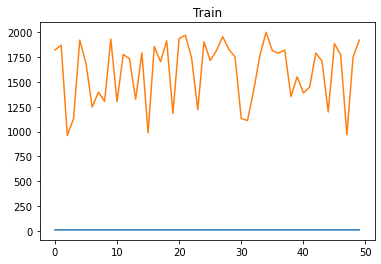

2/2 [==============================] - 2s 9ms/step


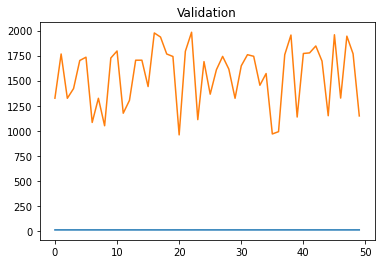

3/3 [==============================] - 0s 11ms/step


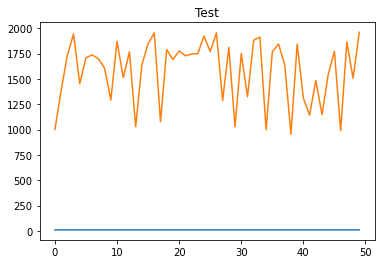

3/3 [==============================] - 0s 6ms/step


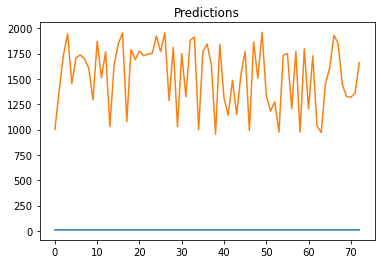

In [33]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_gru_mse

2423214.975470784

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2547791.0000 - root_mean_squared_error: 1596.1802

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 61s 5s/step - loss: 2531187.7500 - root_mean_squared_error: 1590.9707 - val_loss: 2506521.5000 - val_root_mean_squared_error: 1583.1997
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2530840.7500 - root_mean_squared_error: 1590.8617

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2530840.7500 - root_mean_squared_error: 1590.8617 - val_loss: 2506099.5000 - val_root_mean_squared_error: 1583.0664
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2496798.0000 - root_mean_squared_error: 1580.1260

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2530285.7500 - root_mean_squared_error: 1590.6871 - val_loss: 2505678.2500 - val_root_mean_squared_error: 1582.9335
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2529930.5000 - root_mean_squared_error: 1590.5756

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2529930.5000 - root_mean_squared_error: 1590.5756 - val_loss: 2505254.2500 - val_root_mean_squared_error: 1582.7994
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2528696.5000 - root_mean_squared_error: 1590.1876

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2529557.5000 - root_mean_squared_error: 1590.4583 - val_loss: 2504831.0000 - val_root_mean_squared_error: 1582.6658
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2529062.0000 - root_mean_squared_error: 1590.3025

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2529062.0000 - root_mean_squared_error: 1590.3025 - val_loss: 2504410.0000 - val_root_mean_squared_error: 1582.5328
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2528701.0000 - root_mean_squared_error: 1590.1890

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2528701.0000 - root_mean_squared_error: 1590.1890 - val_loss: 2503992.7500 - val_root_mean_squared_error: 1582.4010
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2503486.0000 - root_mean_squared_error: 1582.2408

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2528214.0000 - root_mean_squared_error: 1590.0359 - val_loss: 2503572.5000 - val_root_mean_squared_error: 1582.2682
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2542524.0000 - root_mean_squared_error: 1594.5294

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2527847.7500 - root_mean_squared_error: 1589.9207 - val_loss: 2503145.0000 - val_root_mean_squared_error: 1582.1331
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2543985.2500 - root_mean_squared_error: 1594.9875

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2527404.5000 - root_mean_squared_error: 1589.7812 - val_loss: 2502714.7500 - val_root_mean_squared_error: 1581.9971
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2526870.7500 - root_mean_squared_error: 1589.6134

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2526870.7500 - root_mean_squared_error: 1589.6134 - val_loss: 2502267.5000 - val_root_mean_squared_error: 1581.8557
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2531288.5000 - root_mean_squared_error: 1591.0023

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2526430.7500 - root_mean_squared_error: 1589.4750 - val_loss: 2501797.2500 - val_root_mean_squared_error: 1581.7070
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2520387.5000 - root_mean_squared_error: 1587.5729

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2525982.0000 - root_mean_squared_error: 1589.3339 - val_loss: 2501301.0000 - val_root_mean_squared_error: 1581.5502
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2535269.2500 - root_mean_squared_error: 1592.2529

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 6s/step - loss: 2525595.5000 - root_mean_squared_error: 1589.2123 - val_loss: 2500770.2500 - val_root_mean_squared_error: 1581.3824
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2524957.5000 - root_mean_squared_error: 1589.0115

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2524957.5000 - root_mean_squared_error: 1589.0115 - val_loss: 2500204.2500 - val_root_mean_squared_error: 1581.2034
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2506250.7500 - root_mean_squared_error: 1583.1143

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2524364.7500 - root_mean_squared_error: 1588.8250 - val_loss: 2499599.5000 - val_root_mean_squared_error: 1581.0122
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2523616.5000 - root_mean_squared_error: 1588.5895

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2523616.5000 - root_mean_squared_error: 1588.5895 - val_loss: 2498961.0000 - val_root_mean_squared_error: 1580.8102
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2533865.7500 - root_mean_squared_error: 1591.8121

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2523050.0000 - root_mean_squared_error: 1588.4111 - val_loss: 2498299.0000 - val_root_mean_squared_error: 1580.6008
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2522389.2500 - root_mean_squared_error: 1588.2031

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2522389.2500 - root_mean_squared_error: 1588.2031 - val_loss: 2497621.0000 - val_root_mean_squared_error: 1580.3864
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2495984.7500 - root_mean_squared_error: 1579.8685

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2521582.5000 - root_mean_squared_error: 1587.9491 - val_loss: 2496920.2500 - val_root_mean_squared_error: 1580.1647
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2520906.5000 - root_mean_squared_error: 1587.7363

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2520906.5000 - root_mean_squared_error: 1587.7363 - val_loss: 2496208.7500 - val_root_mean_squared_error: 1579.9395
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2520124.2500 - root_mean_squared_error: 1587.4899

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 2520124.2500 - root_mean_squared_error: 1587.4899 - val_loss: 2495493.0000 - val_root_mean_squared_error: 1579.7129
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2519597.2500 - root_mean_squared_error: 1587.3240

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2519597.2500 - root_mean_squared_error: 1587.3240 - val_loss: 2494773.5000 - val_root_mean_squared_error: 1579.4852
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2510194.7500 - root_mean_squared_error: 1584.3594

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2518759.2500 - root_mean_squared_error: 1587.0599 - val_loss: 2494058.0000 - val_root_mean_squared_error: 1579.2587
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2491093.0000 - root_mean_squared_error: 1578.3197

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2518055.5000 - root_mean_squared_error: 1586.8383 - val_loss: 2493340.2500 - val_root_mean_squared_error: 1579.0314
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2517320.7500 - root_mean_squared_error: 1586.6067

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2517320.7500 - root_mean_squared_error: 1586.6067 - val_loss: 2492626.5000 - val_root_mean_squared_error: 1578.8053
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2516981.5000 - root_mean_squared_error: 1586.4998

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 2516981.5000 - root_mean_squared_error: 1586.4998 - val_loss: 2491928.2500 - val_root_mean_squared_error: 1578.5842
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2588936.7500 - root_mean_squared_error: 1609.0173

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2516177.2500 - root_mean_squared_error: 1586.2462 - val_loss: 2491245.2500 - val_root_mean_squared_error: 1578.3679
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2517564.2500 - root_mean_squared_error: 1586.6835

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2515500.2500 - root_mean_squared_error: 1586.0328 - val_loss: 2490578.2500 - val_root_mean_squared_error: 1578.1566
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2516671.2500 - root_mean_squared_error: 1586.4020

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2514805.0000 - root_mean_squared_error: 1585.8137 - val_loss: 2489928.2500 - val_root_mean_squared_error: 1577.9507
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2529432.0000 - root_mean_squared_error: 1590.4188

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2514145.5000 - root_mean_squared_error: 1585.6057 - val_loss: 2489293.7500 - val_root_mean_squared_error: 1577.7496
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2513479.2500 - root_mean_squared_error: 1585.3956

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2513479.2500 - root_mean_squared_error: 1585.3956 - val_loss: 2488683.2500 - val_root_mean_squared_error: 1577.5562
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2512940.7500 - root_mean_squared_error: 1585.2258

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2512940.7500 - root_mean_squared_error: 1585.2258 - val_loss: 2488089.7500 - val_root_mean_squared_error: 1577.3680
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2512245.0000 - root_mean_squared_error: 1585.0063

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2512245.0000 - root_mean_squared_error: 1585.0063 - val_loss: 2487513.5000 - val_root_mean_squared_error: 1577.1853
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2511824.0000 - root_mean_squared_error: 1584.8735

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2511824.0000 - root_mean_squared_error: 1584.8735 - val_loss: 2486944.0000 - val_root_mean_squared_error: 1577.0048
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2471987.0000 - root_mean_squared_error: 1572.2554

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2510878.5000 - root_mean_squared_error: 1584.5752 - val_loss: 2486378.0000 - val_root_mean_squared_error: 1576.8253
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2510430.0000 - root_mean_squared_error: 1584.4336

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2510430.0000 - root_mean_squared_error: 1584.4336 - val_loss: 2485814.5000 - val_root_mean_squared_error: 1576.6465
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2510036.7500 - root_mean_squared_error: 1584.3096

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2510036.7500 - root_mean_squared_error: 1584.3096 - val_loss: 2485254.2500 - val_root_mean_squared_error: 1576.4689
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2528551.2500 - root_mean_squared_error: 1590.1418

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2509217.0000 - root_mean_squared_error: 1584.0508 - val_loss: 2484699.2500 - val_root_mean_squared_error: 1576.2930
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2500730.5000 - root_mean_squared_error: 1581.3699

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2508722.5000 - root_mean_squared_error: 1583.8948 - val_loss: 2484149.7500 - val_root_mean_squared_error: 1576.1185
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2508228.7500 - root_mean_squared_error: 1583.7389

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2508228.7500 - root_mean_squared_error: 1583.7389 - val_loss: 2483605.0000 - val_root_mean_squared_error: 1575.9457
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2518738.2500 - root_mean_squared_error: 1587.0533

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2507812.2500 - root_mean_squared_error: 1583.6073 - val_loss: 2483058.2500 - val_root_mean_squared_error: 1575.7722
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2509462.7500 - root_mean_squared_error: 1584.1284

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2507074.7500 - root_mean_squared_error: 1583.3745 - val_loss: 2482520.7500 - val_root_mean_squared_error: 1575.6017
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2506629.2500 - root_mean_squared_error: 1583.2338

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2506629.2500 - root_mean_squared_error: 1583.2338 - val_loss: 2481983.5000 - val_root_mean_squared_error: 1575.4312
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2507883.7500 - root_mean_squared_error: 1583.6299

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2506339.5000 - root_mean_squared_error: 1583.1423 - val_loss: 2481446.0000 - val_root_mean_squared_error: 1575.2606
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2511169.7500 - root_mean_squared_error: 1584.6671

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2505874.2500 - root_mean_squared_error: 1582.9954 - val_loss: 2480909.2500 - val_root_mean_squared_error: 1575.0902
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2505251.7500 - root_mean_squared_error: 1582.7987

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 2505251.7500 - root_mean_squared_error: 1582.7987 - val_loss: 2480381.0000 - val_root_mean_squared_error: 1574.9225
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2502607.0000 - root_mean_squared_error: 1581.9630

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2504580.0000 - root_mean_squared_error: 1582.5865 - val_loss: 2479854.2500 - val_root_mean_squared_error: 1574.7552
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2498174.0000 - root_mean_squared_error: 1580.5613

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2503945.0000 - root_mean_squared_error: 1582.3859 - val_loss: 2479333.5000 - val_root_mean_squared_error: 1574.5900
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2522512.0000 - root_mean_squared_error: 1588.2418

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 4s 15ms/step


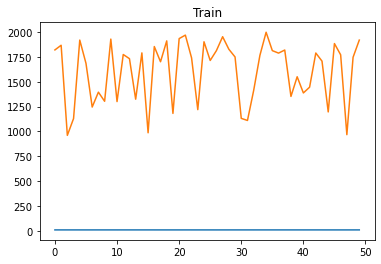

2/2 [==============================] - 2s 11ms/step


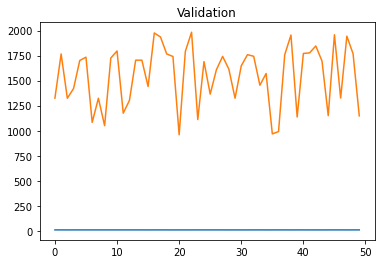

3/3 [==============================] - 0s 6ms/step


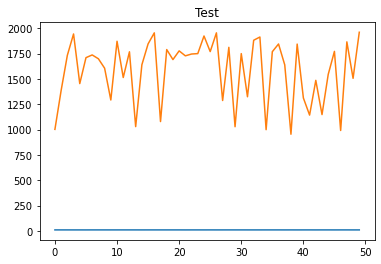

3/3 [==============================] - 0s 5ms/step


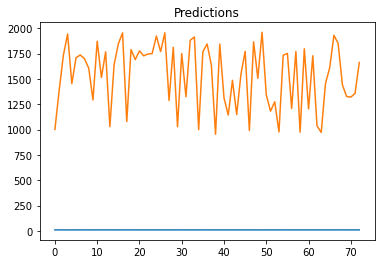

In [35]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [36]:
mavg_auto_lstm_mse

2427328.795638357

# Hybrid

## General

### CNN LSTM

In [37]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2529924.5000 - root_mean_squared_error: 1590.5736

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 189s 17s/step - loss: 2529924.5000 - root_mean_squared_error: 1590.5736 - val_loss: 2505938.2500 - val_root_mean_squared_error: 1583.0155
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2528500.0000 - root_mean_squared_error: 1590.1257

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 2528500.0000 - root_mean_squared_error: 1590.1257 - val_loss: 2504589.0000 - val_root_mean_squared_error: 1582.5894
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2527553.0000 - root_mean_squared_error: 1589.8280

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 128s 18s/step - loss: 2527553.0000 - root_mean_squared_error: 1589.8280 - val_loss: 2503919.0000 - val_root_mean_squared_error: 1582.3777
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2526907.0000 - root_mean_squared_error: 1589.6248

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 108s 15s/step - loss: 2526907.0000 - root_mean_squared_error: 1589.6248 - val_loss: 2503300.5000 - val_root_mean_squared_error: 1582.1823
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2526292.2500 - root_mean_squared_error: 1589.4314

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 2526292.2500 - root_mean_squared_error: 1589.4314 - val_loss: 2502695.2500 - val_root_mean_squared_error: 1581.9910
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2525683.7500 - root_mean_squared_error: 1589.2400

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 2525683.7500 - root_mean_squared_error: 1589.2400 - val_loss: 2502093.0000 - val_root_mean_squared_error: 1581.8005
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2525077.2500 - root_mean_squared_error: 1589.0492

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 119s 16s/step - loss: 2525077.2500 - root_mean_squared_error: 1589.0492 - val_loss: 2501483.2500 - val_root_mean_squared_error: 1581.6078
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2524463.7500 - root_mean_squared_error: 1588.8561

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 14s/step - loss: 2524463.7500 - root_mean_squared_error: 1588.8561 - val_loss: 2500861.2500 - val_root_mean_squared_error: 1581.4111
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2523838.0000 - root_mean_squared_error: 1588.6592

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 15s/step - loss: 2523838.0000 - root_mean_squared_error: 1588.6592 - val_loss: 2500229.5000 - val_root_mean_squared_error: 1581.2114
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2523207.0000 - root_mean_squared_error: 1588.4606

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 117s 17s/step - loss: 2523207.0000 - root_mean_squared_error: 1588.4606 - val_loss: 2499591.5000 - val_root_mean_squared_error: 1581.0095
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2522570.0000 - root_mean_squared_error: 1588.2600

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 2522570.0000 - root_mean_squared_error: 1588.2600 - val_loss: 2498951.0000 - val_root_mean_squared_error: 1580.8071
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2521915.5000 - root_mean_squared_error: 1588.0540

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 143s 20s/step - loss: 2521915.5000 - root_mean_squared_error: 1588.0540 - val_loss: 2498282.5000 - val_root_mean_squared_error: 1580.5956
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2521236.5000 - root_mean_squared_error: 1587.8402

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 14s/step - loss: 2521236.5000 - root_mean_squared_error: 1587.8402 - val_loss: 2497602.2500 - val_root_mean_squared_error: 1580.3804
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2520555.5000 - root_mean_squared_error: 1587.6257

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 128s 18s/step - loss: 2520555.5000 - root_mean_squared_error: 1587.6257 - val_loss: 2496911.7500 - val_root_mean_squared_error: 1580.1620
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2519870.0000 - root_mean_squared_error: 1587.4098

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 2519870.0000 - root_mean_squared_error: 1587.4098 - val_loss: 2496240.2500 - val_root_mean_squared_error: 1579.9495
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2519214.2500 - root_mean_squared_error: 1587.2032

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 123s 17s/step - loss: 2519214.2500 - root_mean_squared_error: 1587.2032 - val_loss: 2495607.2500 - val_root_mean_squared_error: 1579.7491
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2518604.0000 - root_mean_squared_error: 1587.0110

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 112s 16s/step - loss: 2518604.0000 - root_mean_squared_error: 1587.0110 - val_loss: 2495040.0000 - val_root_mean_squared_error: 1579.5696
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2518060.2500 - root_mean_squared_error: 1586.8397

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 2518060.2500 - root_mean_squared_error: 1586.8397 - val_loss: 2494526.0000 - val_root_mean_squared_error: 1579.4069
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2530905.7500 - root_mean_squared_error: 1590.8821

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 118s 17s/step - loss: 2517564.5000 - root_mean_squared_error: 1586.6835 - val_loss: 2494059.7500 - val_root_mean_squared_error: 1579.2593
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2535782.5000 - root_mean_squared_error: 1592.4141

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 2517117.7500 - root_mean_squared_error: 1586.5427 - val_loss: 2493635.7500 - val_root_mean_squared_error: 1579.1250
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2516706.0000 - root_mean_squared_error: 1586.4130

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 2516706.0000 - root_mean_squared_error: 1586.4130 - val_loss: 2493248.5000 - val_root_mean_squared_error: 1579.0023
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2531691.5000 - root_mean_squared_error: 1591.1290

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 2516330.7500 - root_mean_squared_error: 1586.2947 - val_loss: 2492886.0000 - val_root_mean_squared_error: 1578.8875
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2532859.2500 - root_mean_squared_error: 1591.4960

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 116s 17s/step - loss: 2515978.5000 - root_mean_squared_error: 1586.1836 - val_loss: 2492546.7500 - val_root_mean_squared_error: 1578.7803
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2515644.5000 - root_mean_squared_error: 1586.0784

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 134s 19s/step - loss: 2515644.5000 - root_mean_squared_error: 1586.0784 - val_loss: 2492225.5000 - val_root_mean_squared_error: 1578.6783
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2515325.5000 - root_mean_squared_error: 1585.9778

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 118s 17s/step - loss: 2515325.5000 - root_mean_squared_error: 1585.9778 - val_loss: 2491914.7500 - val_root_mean_squared_error: 1578.5800
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2515020.7500 - root_mean_squared_error: 1585.8817

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 119s 17s/step - loss: 2515020.7500 - root_mean_squared_error: 1585.8817 - val_loss: 2491614.2500 - val_root_mean_squared_error: 1578.4847
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2514725.7500 - root_mean_squared_error: 1585.7887

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 2514725.7500 - root_mean_squared_error: 1585.7887 - val_loss: 2491333.5000 - val_root_mean_squared_error: 1578.3959
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2514452.5000 - root_mean_squared_error: 1585.7025

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 153s 22s/step - loss: 2514452.5000 - root_mean_squared_error: 1585.7025 - val_loss: 2491070.0000 - val_root_mean_squared_error: 1578.3124
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2514194.7500 - root_mean_squared_error: 1585.6212

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 2514194.7500 - root_mean_squared_error: 1585.6212 - val_loss: 2490819.7500 - val_root_mean_squared_error: 1578.2332
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2506386.7500 - root_mean_squared_error: 1583.1572

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 16s/step - loss: 2513948.5000 - root_mean_squared_error: 1585.5436 - val_loss: 2490579.7500 - val_root_mean_squared_error: 1578.1571
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2513711.0000 - root_mean_squared_error: 1585.4688

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 16s/step - loss: 2513711.0000 - root_mean_squared_error: 1585.4688 - val_loss: 2490348.2500 - val_root_mean_squared_error: 1578.0837
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2513482.7500 - root_mean_squared_error: 1585.3967

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 16s/step - loss: 2513482.7500 - root_mean_squared_error: 1585.3967 - val_loss: 2490124.7500 - val_root_mean_squared_error: 1578.0129
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2513261.7500 - root_mean_squared_error: 1585.3270

KeyboardInterrupt: 

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")

In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)